In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
# Load the regular expression library
import re
import seaborn as sns
# Import the wordcloud library
from wordcloud import WordCloud

In [2]:
post_data = pd.read_csv('./data/data_2010to2020_sc100_all.csv')
post_data.head()

,post_id,title,url,text,score,num_comments,created
0,bhaof3,(Update) Neighbors child has disabilities and ...,https://www.reddit.com/r/legaladvice/comments/...,Original post: https://www.reddit.com/r/legala...,55763,4,4/25/2019 12:29
1,6dh9vh,[Super Awesome Update] Sat down on my friend's...,https://www.reddit.com/r/legaladvice/comments/...,I never thought this would turn out the way it...,54473,2,5/26/2017 10:27
2,8brtfc,"I told my math teacher about my mother, and sh...",https://www.reddit.com/r/legaladvice/comments/...,I got my 13 year old brother after school yest...,40091,5,4/12/2018 13:09
3,bieir5,[UPDATE] [PA] I followed and reported a drunk ...,https://www.reddit.com/r/legaladvice/comments/...,This is an update to my [original post](https:...,38858,3,4/28/2019 14:48
4,beuf9y,"UPDATE: My father and step mother died, leavin...",https://www.reddit.com/r/legaladvice/comments/...,[Here's my original post](https://www.reddit.c...,35337,4,4/18/2019 23:06


In [3]:
len(post_data)

17133

In [7]:
post_data['num_comments'].describe()

count    17133.000000
mean        66.888111
std         71.513341
min          0.000000
25%         27.000000
50%         47.000000
75%         84.000000
max       2406.000000
Name: num_comments, dtype: float64

In [9]:
post_data.iloc[0].url

'https://www.reddit.com/r/legaladvice/comments/bhaof3/update_neighbors_child_has_disabilities_and_wont/'

In [11]:
# Earliest post was Jan 1 2015 apparently (maybe that's when the data collection started at pushshift?)
min(post_data['created'])

'1/1/2015 13:11'

In [19]:
post_data_text = post_data[['title','text']]
post_data_text.head()

,title,text
0,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...
1,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...
2,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...
3,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...
4,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...


In [20]:
#combine the title and text
post_data_text['alltext']= post_data_text['title'] + ' ' + post_data_text['text']
post_data_text.head()

C:\anaconda_python\envs\insight_2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,text,alltext
0,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,(Update) Neighbors child has disabilities and ...
1,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,[Super Awesome Update] Sat down on my friend's...
2,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,"I told my math teacher about my mother, and sh..."
3,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,[UPDATE] [PA] I followed and reported a drunk ...
4,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,"UPDATE: My father and step mother died, leavin..."


In [31]:
# There are some nan values
post_data_text.iloc[5]['alltext']

nan

In [32]:
#198 empty text field, fill with title, probably deleted
post_data_text[post_data_text['alltext'].isna()]

,title,text,alltext,alltext_processed
5,Deadbeat dad ditched my mom when she was pregn...,NaN,NaN,nan
98,"One of my relatives is ""Homeschooling"" her kid...",NaN,NaN,nan
178,I work for a privately owned brewery/restauran...,NaN,NaN,nan
279,Police Officer: I am going to search your vehi...,NaN,NaN,nan
298,[AL] my brother was attacked in Federal Prison...,NaN,NaN,nan
...,...,...,...,...
16393,"QUEBEC(Canada): last week, my roommate and I w...",NaN,NaN,nan
16402,"Question: As a military retiree, does my wife ...",NaN,NaN,nan
16467,Broke up with my gf. She got a lawyer and gave...,NaN,NaN,nan
16520,"From torture to tiny bruises, 7 years of CPS i...",NaN,NaN,nan


In [35]:
post_data_text['alltext'].fillna(post_data_text['title'], inplace=True)

C:\anaconda_python\envs\insight_2\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [36]:
post_data_text[post_data_text['alltext'].isna()]

,title,text,alltext,alltext_processed


### Simple preprocessing

In [23]:
post_data_text.dtypes

title      object
text       object
alltext    object
dtype: object

In [24]:


# Remove punctuation
post_data_text['alltext_processed'] = post_data_text['alltext'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

# Convert the titles to lowercase
post_data_text['alltext_processed'] = post_data_text['alltext_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
post_data_text['alltext_processed'].head()

C:\anaconda_python\envs\insight_2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda_python\envs\insight_2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    (update) neighbors child has disabilities and ...
1    [super awesome update] sat down on my friend's...
2    i told my math teacher about my mother and she...
3    [update] [pa] i followed and reported a drunk ...
4    update: my father and step mother died leaving...
Name: alltext_processed, dtype: object

In [25]:
post_data_text.iloc[0]['alltext_processed']

'(update) neighbors child has disabilities and won\'t stop climbing the fence entering my house and "freeing" my dogs original post: https://wwwredditcom/r/legaladvice/comments/b93dx3/neighbors_child_has_disabilities_and_wont_stop/\n\ni\'m sad about this update for the kid i took the majority of the given advice and called the police non-emergency number and asked for an officer to come out because i had questions about an issue i\'m having and briefly explained it\n\nofficer shows up i invite him in and explain the whole situation he isn\'t really sure what to do about it right now so he asked for a supervisor come to his position supervisor shows up and i go over the whole thing again we go upstairs to my computer where i have all the videos clipped and saved (9 times of her entering the backyard and 4 of her entering the house through the garage) \n\nwe watched each one and he gets on his cellphone and goes back to his car a few minutes later he comes back with 3 flash drives and as

### Wordcloud

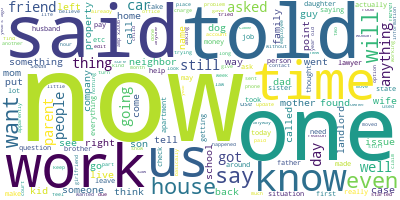

In [26]:


# Join the different processed titles together.
long_string = ','.join(list(post_data_text['alltext_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

A lot of stopwords need removing, but can see some stuff like car, property, work

In [5]:
import string
import nltk
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

In [28]:
def first_clean(text,idx):
    text=text.strip()
    os.system('cls')
    print(f'Doing row {idx}')
    text = text.replace('\n', ' ')
    text = "".join([word.lower() for word in text if word not in string.punctuation and (not word.isnumeric())])
    return text

In [37]:
post_data_text['cleaned_alltext'] = post_data_text.apply(lambda x: first_clean(x['alltext'], x.name), axis=1)

Doing row 0
Doing row 1
Doing row 2
Doing row 3
Doing row 4
Doing row 5
Doing row 6
Doing row 7
Doing row 8
Doing row 9
Doing row 10
Doing row 11
Doing row 12
Doing row 13
Doing row 14
Doing row 15
Doing row 16
Doing row 17
Doing row 18
Doing row 19
Doing row 20
Doing row 21
Doing row 22
Doing row 23
Doing row 24
Doing row 25
Doing row 26
Doing row 27
Doing row 28
Doing row 29
Doing row 30
Doing row 31
Doing row 32
Doing row 33
Doing row 34
Doing row 35
Doing row 36
Doing row 37
Doing row 38
Doing row 39
Doing row 40
Doing row 41
Doing row 42
Doing row 43
Doing row 44
Doing row 45
Doing row 46
Doing row 47
Doing row 48
Doing row 49
Doing row 50
Doing row 51
Doing row 52
Doing row 53
Doing row 54
Doing row 55
Doing row 56
Doing row 57
Doing row 58
Doing row 59
Doing row 60
Doing row 61
Doing row 62
Doing row 63
Doing row 64
Doing row 65
Doing row 66
Doing row 67
Doing row 68
Doing row 69
Doing row 70
Doing row 71
Doing row 72
Doing row 73
Doing row 74
Doing row 75
Doing row 76
Doing row

Doing row 1006
Doing row 1007
Doing row 1008
Doing row 1009
Doing row 1010
Doing row 1011
Doing row 1012
Doing row 1013
Doing row 1014
Doing row 1015
Doing row 1016
Doing row 1017
Doing row 1018
Doing row 1019
Doing row 1020
Doing row 1021
Doing row 1022
Doing row 1023
Doing row 1024
Doing row 1025
Doing row 1026
Doing row 1027
Doing row 1028
Doing row 1029
Doing row 1030
Doing row 1031
Doing row 1032
Doing row 1033
Doing row 1034
Doing row 1035
Doing row 1036
Doing row 1037
Doing row 1038
Doing row 1039
Doing row 1040
Doing row 1041
Doing row 1042
Doing row 1043
Doing row 1044
Doing row 1045
Doing row 1046
Doing row 1047
Doing row 1048
Doing row 1049
Doing row 1050
Doing row 1051
Doing row 1052
Doing row 1053
Doing row 1054
Doing row 1055
Doing row 1056
Doing row 1057
Doing row 1058
Doing row 1059
Doing row 1060
Doing row 1061
Doing row 1062
Doing row 1063
Doing row 1064
Doing row 1065
Doing row 1066
Doing row 1067
Doing row 1068
Doing row 1069
Doing row 1070
Doing row 1071
Doing row 

Doing row 1916
Doing row 1917
Doing row 1918
Doing row 1919
Doing row 1920
Doing row 1921
Doing row 1922
Doing row 1923
Doing row 1924
Doing row 1925
Doing row 1926
Doing row 1927
Doing row 1928
Doing row 1929
Doing row 1930
Doing row 1931
Doing row 1932
Doing row 1933
Doing row 1934
Doing row 1935
Doing row 1936
Doing row 1937
Doing row 1938
Doing row 1939
Doing row 1940
Doing row 1941
Doing row 1942
Doing row 1943
Doing row 1944
Doing row 1945
Doing row 1946
Doing row 1947
Doing row 1948
Doing row 1949
Doing row 1950
Doing row 1951
Doing row 1952
Doing row 1953
Doing row 1954
Doing row 1955
Doing row 1956
Doing row 1957
Doing row 1958
Doing row 1959
Doing row 1960
Doing row 1961
Doing row 1962
Doing row 1963
Doing row 1964
Doing row 1965
Doing row 1966
Doing row 1967
Doing row 1968
Doing row 1969
Doing row 1970
Doing row 1971
Doing row 1972
Doing row 1973
Doing row 1974
Doing row 1975
Doing row 1976
Doing row 1977
Doing row 1978
Doing row 1979
Doing row 1980
Doing row 1981
Doing row 

Doing row 2763
Doing row 2764
Doing row 2765
Doing row 2766
Doing row 2767
Doing row 2768
Doing row 2769
Doing row 2770
Doing row 2771
Doing row 2772
Doing row 2773
Doing row 2774
Doing row 2775
Doing row 2776
Doing row 2777
Doing row 2778
Doing row 2779
Doing row 2780
Doing row 2781
Doing row 2782
Doing row 2783
Doing row 2784
Doing row 2785
Doing row 2786
Doing row 2787
Doing row 2788
Doing row 2789
Doing row 2790
Doing row 2791
Doing row 2792
Doing row 2793
Doing row 2794
Doing row 2795
Doing row 2796
Doing row 2797
Doing row 2798
Doing row 2799
Doing row 2800
Doing row 2801
Doing row 2802
Doing row 2803
Doing row 2804
Doing row 2805
Doing row 2806
Doing row 2807
Doing row 2808
Doing row 2809
Doing row 2810
Doing row 2811
Doing row 2812
Doing row 2813
Doing row 2814
Doing row 2815
Doing row 2816
Doing row 2817
Doing row 2818
Doing row 2819
Doing row 2820
Doing row 2821
Doing row 2822
Doing row 2823
Doing row 2824
Doing row 2825
Doing row 2826
Doing row 2827
Doing row 2828
Doing row 

Doing row 3406
Doing row 3407
Doing row 3408
Doing row 3409
Doing row 3410
Doing row 3411
Doing row 3412
Doing row 3413
Doing row 3414
Doing row 3415
Doing row 3416
Doing row 3417
Doing row 3418
Doing row 3419
Doing row 3420
Doing row 3421
Doing row 3422
Doing row 3423
Doing row 3424
Doing row 3425
Doing row 3426
Doing row 3427
Doing row 3428
Doing row 3429
Doing row 3430
Doing row 3431
Doing row 3432
Doing row 3433
Doing row 3434
Doing row 3435
Doing row 3436
Doing row 3437
Doing row 3438
Doing row 3439
Doing row 3440
Doing row 3441
Doing row 3442
Doing row 3443
Doing row 3444
Doing row 3445
Doing row 3446
Doing row 3447
Doing row 3448
Doing row 3449
Doing row 3450
Doing row 3451
Doing row 3452
Doing row 3453
Doing row 3454
Doing row 3455
Doing row 3456
Doing row 3457
Doing row 3458
Doing row 3459
Doing row 3460
Doing row 3461
Doing row 3462
Doing row 3463
Doing row 3464
Doing row 3465
Doing row 3466
Doing row 3467
Doing row 3468
Doing row 3469
Doing row 3470
Doing row 3471
Doing row 

Doing row 4245
Doing row 4246
Doing row 4247
Doing row 4248
Doing row 4249
Doing row 4250
Doing row 4251
Doing row 4252
Doing row 4253
Doing row 4254
Doing row 4255
Doing row 4256
Doing row 4257
Doing row 4258
Doing row 4259
Doing row 4260
Doing row 4261
Doing row 4262
Doing row 4263
Doing row 4264
Doing row 4265
Doing row 4266
Doing row 4267
Doing row 4268
Doing row 4269
Doing row 4270
Doing row 4271
Doing row 4272
Doing row 4273
Doing row 4274
Doing row 4275
Doing row 4276
Doing row 4277
Doing row 4278
Doing row 4279
Doing row 4280
Doing row 4281
Doing row 4282
Doing row 4283
Doing row 4284
Doing row 4285
Doing row 4286
Doing row 4287
Doing row 4288
Doing row 4289
Doing row 4290
Doing row 4291
Doing row 4292
Doing row 4293
Doing row 4294
Doing row 4295
Doing row 4296
Doing row 4297
Doing row 4298
Doing row 4299
Doing row 4300
Doing row 4301
Doing row 4302
Doing row 4303
Doing row 4304
Doing row 4305
Doing row 4306
Doing row 4307
Doing row 4308
Doing row 4309
Doing row 4310
Doing row 

Doing row 5020
Doing row 5021
Doing row 5022
Doing row 5023
Doing row 5024
Doing row 5025
Doing row 5026
Doing row 5027
Doing row 5028
Doing row 5029
Doing row 5030
Doing row 5031
Doing row 5032
Doing row 5033
Doing row 5034
Doing row 5035
Doing row 5036
Doing row 5037
Doing row 5038
Doing row 5039
Doing row 5040
Doing row 5041
Doing row 5042
Doing row 5043
Doing row 5044
Doing row 5045
Doing row 5046
Doing row 5047
Doing row 5048
Doing row 5049
Doing row 5050
Doing row 5051
Doing row 5052
Doing row 5053
Doing row 5054
Doing row 5055
Doing row 5056
Doing row 5057
Doing row 5058
Doing row 5059
Doing row 5060
Doing row 5061
Doing row 5062
Doing row 5063
Doing row 5064
Doing row 5065
Doing row 5066
Doing row 5067
Doing row 5068
Doing row 5069
Doing row 5070
Doing row 5071
Doing row 5072
Doing row 5073
Doing row 5074
Doing row 5075
Doing row 5076
Doing row 5077
Doing row 5078
Doing row 5079
Doing row 5080
Doing row 5081
Doing row 5082
Doing row 5083
Doing row 5084
Doing row 5085
Doing row 

Doing row 5642
Doing row 5643
Doing row 5644
Doing row 5645
Doing row 5646
Doing row 5647
Doing row 5648
Doing row 5649
Doing row 5650
Doing row 5651
Doing row 5652
Doing row 5653
Doing row 5654
Doing row 5655
Doing row 5656
Doing row 5657
Doing row 5658
Doing row 5659
Doing row 5660
Doing row 5661
Doing row 5662
Doing row 5663
Doing row 5664
Doing row 5665
Doing row 5666
Doing row 5667
Doing row 5668
Doing row 5669
Doing row 5670
Doing row 5671
Doing row 5672
Doing row 5673
Doing row 5674
Doing row 5675
Doing row 5676
Doing row 5677
Doing row 5678
Doing row 5679
Doing row 5680
Doing row 5681
Doing row 5682
Doing row 5683
Doing row 5684
Doing row 5685
Doing row 5686
Doing row 5687
Doing row 5688
Doing row 5689
Doing row 5690
Doing row 5691
Doing row 5692
Doing row 5693
Doing row 5694
Doing row 5695
Doing row 5696
Doing row 5697
Doing row 5698
Doing row 5699
Doing row 5700
Doing row 5701
Doing row 5702
Doing row 5703
Doing row 5704
Doing row 5705
Doing row 5706
Doing row 5707
Doing row 

Doing row 6434
Doing row 6435
Doing row 6436
Doing row 6437
Doing row 6438
Doing row 6439
Doing row 6440
Doing row 6441
Doing row 6442
Doing row 6443
Doing row 6444
Doing row 6445
Doing row 6446
Doing row 6447
Doing row 6448
Doing row 6449
Doing row 6450
Doing row 6451
Doing row 6452
Doing row 6453
Doing row 6454
Doing row 6455
Doing row 6456
Doing row 6457
Doing row 6458
Doing row 6459
Doing row 6460
Doing row 6461
Doing row 6462
Doing row 6463
Doing row 6464
Doing row 6465
Doing row 6466
Doing row 6467
Doing row 6468
Doing row 6469
Doing row 6470
Doing row 6471
Doing row 6472
Doing row 6473
Doing row 6474
Doing row 6475
Doing row 6476
Doing row 6477
Doing row 6478
Doing row 6479
Doing row 6480
Doing row 6481
Doing row 6482
Doing row 6483
Doing row 6484
Doing row 6485
Doing row 6486
Doing row 6487
Doing row 6488
Doing row 6489
Doing row 6490
Doing row 6491
Doing row 6492
Doing row 6493
Doing row 6494
Doing row 6495
Doing row 6496
Doing row 6497
Doing row 6498
Doing row 6499
Doing row 

Doing row 7049
Doing row 7050
Doing row 7051
Doing row 7052
Doing row 7053
Doing row 7054
Doing row 7055
Doing row 7056
Doing row 7057
Doing row 7058
Doing row 7059
Doing row 7060
Doing row 7061
Doing row 7062
Doing row 7063
Doing row 7064
Doing row 7065
Doing row 7066
Doing row 7067
Doing row 7068
Doing row 7069
Doing row 7070
Doing row 7071
Doing row 7072
Doing row 7073
Doing row 7074
Doing row 7075
Doing row 7076
Doing row 7077
Doing row 7078
Doing row 7079
Doing row 7080
Doing row 7081
Doing row 7082
Doing row 7083
Doing row 7084
Doing row 7085
Doing row 7086
Doing row 7087
Doing row 7088
Doing row 7089
Doing row 7090
Doing row 7091
Doing row 7092
Doing row 7093
Doing row 7094
Doing row 7095
Doing row 7096
Doing row 7097
Doing row 7098
Doing row 7099
Doing row 7100
Doing row 7101
Doing row 7102
Doing row 7103
Doing row 7104
Doing row 7105
Doing row 7106
Doing row 7107
Doing row 7108
Doing row 7109
Doing row 7110
Doing row 7111
Doing row 7112
Doing row 7113
Doing row 7114
Doing row 

Doing row 7777
Doing row 7778
Doing row 7779
Doing row 7780
Doing row 7781
Doing row 7782
Doing row 7783
Doing row 7784
Doing row 7785
Doing row 7786
Doing row 7787
Doing row 7788
Doing row 7789
Doing row 7790
Doing row 7791
Doing row 7792
Doing row 7793
Doing row 7794
Doing row 7795
Doing row 7796
Doing row 7797
Doing row 7798
Doing row 7799
Doing row 7800
Doing row 7801
Doing row 7802
Doing row 7803
Doing row 7804
Doing row 7805
Doing row 7806
Doing row 7807
Doing row 7808
Doing row 7809
Doing row 7810
Doing row 7811
Doing row 7812
Doing row 7813
Doing row 7814
Doing row 7815
Doing row 7816
Doing row 7817
Doing row 7818
Doing row 7819
Doing row 7820
Doing row 7821
Doing row 7822
Doing row 7823
Doing row 7824
Doing row 7825
Doing row 7826
Doing row 7827
Doing row 7828
Doing row 7829
Doing row 7830
Doing row 7831
Doing row 7832
Doing row 7833
Doing row 7834
Doing row 7835
Doing row 7836
Doing row 7837
Doing row 7838
Doing row 7839
Doing row 7840
Doing row 7841
Doing row 7842
Doing row 

Doing row 8421
Doing row 8422
Doing row 8423
Doing row 8424
Doing row 8425
Doing row 8426
Doing row 8427
Doing row 8428
Doing row 8429
Doing row 8430
Doing row 8431
Doing row 8432
Doing row 8433
Doing row 8434
Doing row 8435
Doing row 8436
Doing row 8437
Doing row 8438
Doing row 8439
Doing row 8440
Doing row 8441
Doing row 8442
Doing row 8443
Doing row 8444
Doing row 8445
Doing row 8446
Doing row 8447
Doing row 8448
Doing row 8449
Doing row 8450
Doing row 8451
Doing row 8452
Doing row 8453
Doing row 8454
Doing row 8455
Doing row 8456
Doing row 8457
Doing row 8458
Doing row 8459
Doing row 8460
Doing row 8461
Doing row 8462
Doing row 8463
Doing row 8464
Doing row 8465
Doing row 8466
Doing row 8467
Doing row 8468
Doing row 8469
Doing row 8470
Doing row 8471
Doing row 8472
Doing row 8473
Doing row 8474
Doing row 8475
Doing row 8476
Doing row 8477
Doing row 8478
Doing row 8479
Doing row 8480
Doing row 8481
Doing row 8482
Doing row 8483
Doing row 8484
Doing row 8485
Doing row 8486
Doing row 

Doing row 8982
Doing row 8983
Doing row 8984
Doing row 8985
Doing row 8986
Doing row 8987
Doing row 8988
Doing row 8989
Doing row 8990
Doing row 8991
Doing row 8992
Doing row 8993
Doing row 8994
Doing row 8995
Doing row 8996
Doing row 8997
Doing row 8998
Doing row 8999
Doing row 9000
Doing row 9001
Doing row 9002
Doing row 9003
Doing row 9004
Doing row 9005
Doing row 9006
Doing row 9007
Doing row 9008
Doing row 9009
Doing row 9010
Doing row 9011
Doing row 9012
Doing row 9013
Doing row 9014
Doing row 9015
Doing row 9016
Doing row 9017
Doing row 9018
Doing row 9019
Doing row 9020
Doing row 9021
Doing row 9022
Doing row 9023
Doing row 9024
Doing row 9025
Doing row 9026
Doing row 9027
Doing row 9028
Doing row 9029
Doing row 9030
Doing row 9031
Doing row 9032
Doing row 9033
Doing row 9034
Doing row 9035
Doing row 9036
Doing row 9037
Doing row 9038
Doing row 9039
Doing row 9040
Doing row 9041
Doing row 9042
Doing row 9043
Doing row 9044
Doing row 9045
Doing row 9046
Doing row 9047
Doing row 

Doing row 9570
Doing row 9571
Doing row 9572
Doing row 9573
Doing row 9574
Doing row 9575
Doing row 9576
Doing row 9577
Doing row 9578
Doing row 9579
Doing row 9580
Doing row 9581
Doing row 9582
Doing row 9583
Doing row 9584
Doing row 9585
Doing row 9586
Doing row 9587
Doing row 9588
Doing row 9589
Doing row 9590
Doing row 9591
Doing row 9592
Doing row 9593
Doing row 9594
Doing row 9595
Doing row 9596
Doing row 9597
Doing row 9598
Doing row 9599
Doing row 9600
Doing row 9601
Doing row 9602
Doing row 9603
Doing row 9604
Doing row 9605
Doing row 9606
Doing row 9607
Doing row 9608
Doing row 9609
Doing row 9610
Doing row 9611
Doing row 9612
Doing row 9613
Doing row 9614
Doing row 9615
Doing row 9616
Doing row 9617
Doing row 9618
Doing row 9619
Doing row 9620
Doing row 9621
Doing row 9622
Doing row 9623
Doing row 9624
Doing row 9625
Doing row 9626
Doing row 9627
Doing row 9628
Doing row 9629
Doing row 9630
Doing row 9631
Doing row 9632
Doing row 9633
Doing row 9634
Doing row 9635
Doing row 

Doing row 10216
Doing row 10217
Doing row 10218
Doing row 10219
Doing row 10220
Doing row 10221
Doing row 10222
Doing row 10223
Doing row 10224
Doing row 10225
Doing row 10226
Doing row 10227
Doing row 10228
Doing row 10229
Doing row 10230
Doing row 10231
Doing row 10232
Doing row 10233
Doing row 10234
Doing row 10235
Doing row 10236
Doing row 10237
Doing row 10238
Doing row 10239
Doing row 10240
Doing row 10241
Doing row 10242
Doing row 10243
Doing row 10244
Doing row 10245
Doing row 10246
Doing row 10247
Doing row 10248
Doing row 10249
Doing row 10250
Doing row 10251
Doing row 10252
Doing row 10253
Doing row 10254
Doing row 10255
Doing row 10256
Doing row 10257
Doing row 10258
Doing row 10259
Doing row 10260
Doing row 10261
Doing row 10262
Doing row 10263
Doing row 10264
Doing row 10265
Doing row 10266
Doing row 10267
Doing row 10268
Doing row 10269
Doing row 10270
Doing row 10271
Doing row 10272
Doing row 10273
Doing row 10274
Doing row 10275
Doing row 10276
Doing row 10277
Doing ro

Doing row 10811
Doing row 10812
Doing row 10813
Doing row 10814
Doing row 10815
Doing row 10816
Doing row 10817
Doing row 10818
Doing row 10819
Doing row 10820
Doing row 10821
Doing row 10822
Doing row 10823
Doing row 10824
Doing row 10825
Doing row 10826
Doing row 10827
Doing row 10828
Doing row 10829
Doing row 10830
Doing row 10831
Doing row 10832
Doing row 10833
Doing row 10834
Doing row 10835
Doing row 10836
Doing row 10837
Doing row 10838
Doing row 10839
Doing row 10840
Doing row 10841
Doing row 10842
Doing row 10843
Doing row 10844
Doing row 10845
Doing row 10846
Doing row 10847
Doing row 10848
Doing row 10849
Doing row 10850
Doing row 10851
Doing row 10852
Doing row 10853
Doing row 10854
Doing row 10855
Doing row 10856
Doing row 10857
Doing row 10858
Doing row 10859
Doing row 10860
Doing row 10861
Doing row 10862
Doing row 10863
Doing row 10864
Doing row 10865
Doing row 10866
Doing row 10867
Doing row 10868
Doing row 10869
Doing row 10870
Doing row 10871
Doing row 10872
Doing ro

Doing row 11503
Doing row 11504
Doing row 11505
Doing row 11506
Doing row 11507
Doing row 11508
Doing row 11509
Doing row 11510
Doing row 11511
Doing row 11512
Doing row 11513
Doing row 11514
Doing row 11515
Doing row 11516
Doing row 11517
Doing row 11518
Doing row 11519
Doing row 11520
Doing row 11521
Doing row 11522
Doing row 11523
Doing row 11524
Doing row 11525
Doing row 11526
Doing row 11527
Doing row 11528
Doing row 11529
Doing row 11530
Doing row 11531
Doing row 11532
Doing row 11533
Doing row 11534
Doing row 11535
Doing row 11536
Doing row 11537
Doing row 11538
Doing row 11539
Doing row 11540
Doing row 11541
Doing row 11542
Doing row 11543
Doing row 11544
Doing row 11545
Doing row 11546
Doing row 11547
Doing row 11548
Doing row 11549
Doing row 11550
Doing row 11551
Doing row 11552
Doing row 11553
Doing row 11554
Doing row 11555
Doing row 11556
Doing row 11557
Doing row 11558
Doing row 11559
Doing row 11560
Doing row 11561
Doing row 11562
Doing row 11563
Doing row 11564
Doing ro

Doing row 12318
Doing row 12319
Doing row 12320
Doing row 12321
Doing row 12322
Doing row 12323
Doing row 12324
Doing row 12325
Doing row 12326
Doing row 12327
Doing row 12328
Doing row 12329
Doing row 12330
Doing row 12331
Doing row 12332
Doing row 12333
Doing row 12334
Doing row 12335
Doing row 12336
Doing row 12337
Doing row 12338
Doing row 12339
Doing row 12340
Doing row 12341
Doing row 12342
Doing row 12343
Doing row 12344
Doing row 12345
Doing row 12346
Doing row 12347
Doing row 12348
Doing row 12349
Doing row 12350
Doing row 12351
Doing row 12352
Doing row 12353
Doing row 12354
Doing row 12355
Doing row 12356
Doing row 12357
Doing row 12358
Doing row 12359
Doing row 12360
Doing row 12361
Doing row 12362
Doing row 12363
Doing row 12364
Doing row 12365
Doing row 12366
Doing row 12367
Doing row 12368
Doing row 12369
Doing row 12370
Doing row 12371
Doing row 12372
Doing row 12373
Doing row 12374
Doing row 12375
Doing row 12376
Doing row 12377
Doing row 12378
Doing row 12379
Doing ro

Doing row 13059
Doing row 13060
Doing row 13061
Doing row 13062
Doing row 13063
Doing row 13064
Doing row 13065
Doing row 13066
Doing row 13067
Doing row 13068
Doing row 13069
Doing row 13070
Doing row 13071
Doing row 13072
Doing row 13073
Doing row 13074
Doing row 13075
Doing row 13076
Doing row 13077
Doing row 13078
Doing row 13079
Doing row 13080
Doing row 13081
Doing row 13082
Doing row 13083
Doing row 13084
Doing row 13085
Doing row 13086
Doing row 13087
Doing row 13088
Doing row 13089
Doing row 13090
Doing row 13091
Doing row 13092
Doing row 13093
Doing row 13094
Doing row 13095
Doing row 13096
Doing row 13097
Doing row 13098
Doing row 13099
Doing row 13100
Doing row 13101
Doing row 13102
Doing row 13103
Doing row 13104
Doing row 13105
Doing row 13106
Doing row 13107
Doing row 13108
Doing row 13109
Doing row 13110
Doing row 13111
Doing row 13112
Doing row 13113
Doing row 13114
Doing row 13115
Doing row 13116
Doing row 13117
Doing row 13118
Doing row 13119
Doing row 13120
Doing ro

Doing row 13573
Doing row 13574
Doing row 13575
Doing row 13576
Doing row 13577
Doing row 13578
Doing row 13579
Doing row 13580
Doing row 13581
Doing row 13582
Doing row 13583
Doing row 13584
Doing row 13585
Doing row 13586
Doing row 13587
Doing row 13588
Doing row 13589
Doing row 13590
Doing row 13591
Doing row 13592
Doing row 13593
Doing row 13594
Doing row 13595
Doing row 13596
Doing row 13597
Doing row 13598
Doing row 13599
Doing row 13600
Doing row 13601
Doing row 13602
Doing row 13603
Doing row 13604
Doing row 13605
Doing row 13606
Doing row 13607
Doing row 13608
Doing row 13609
Doing row 13610
Doing row 13611
Doing row 13612
Doing row 13613
Doing row 13614
Doing row 13615
Doing row 13616
Doing row 13617
Doing row 13618
Doing row 13619
Doing row 13620
Doing row 13621
Doing row 13622
Doing row 13623
Doing row 13624
Doing row 13625
Doing row 13626
Doing row 13627
Doing row 13628
Doing row 13629
Doing row 13630
Doing row 13631
Doing row 13632
Doing row 13633
Doing row 13634
Doing ro

Doing row 14247
Doing row 14248
Doing row 14249
Doing row 14250
Doing row 14251
Doing row 14252
Doing row 14253
Doing row 14254
Doing row 14255
Doing row 14256
Doing row 14257
Doing row 14258
Doing row 14259
Doing row 14260
Doing row 14261
Doing row 14262
Doing row 14263
Doing row 14264
Doing row 14265
Doing row 14266
Doing row 14267
Doing row 14268
Doing row 14269
Doing row 14270
Doing row 14271
Doing row 14272
Doing row 14273
Doing row 14274
Doing row 14275
Doing row 14276
Doing row 14277
Doing row 14278
Doing row 14279
Doing row 14280
Doing row 14281
Doing row 14282
Doing row 14283
Doing row 14284
Doing row 14285
Doing row 14286
Doing row 14287
Doing row 14288
Doing row 14289
Doing row 14290
Doing row 14291
Doing row 14292
Doing row 14293
Doing row 14294
Doing row 14295
Doing row 14296
Doing row 14297
Doing row 14298
Doing row 14299
Doing row 14300
Doing row 14301
Doing row 14302
Doing row 14303
Doing row 14304
Doing row 14305
Doing row 14306
Doing row 14307
Doing row 14308
Doing ro

Doing row 14833
Doing row 14834
Doing row 14835
Doing row 14836
Doing row 14837
Doing row 14838
Doing row 14839
Doing row 14840
Doing row 14841
Doing row 14842
Doing row 14843
Doing row 14844
Doing row 14845
Doing row 14846
Doing row 14847
Doing row 14848
Doing row 14849
Doing row 14850
Doing row 14851
Doing row 14852
Doing row 14853
Doing row 14854
Doing row 14855
Doing row 14856
Doing row 14857
Doing row 14858
Doing row 14859
Doing row 14860
Doing row 14861
Doing row 14862
Doing row 14863
Doing row 14864
Doing row 14865
Doing row 14866
Doing row 14867
Doing row 14868
Doing row 14869
Doing row 14870
Doing row 14871
Doing row 14872
Doing row 14873
Doing row 14874
Doing row 14875
Doing row 14876
Doing row 14877
Doing row 14878
Doing row 14879
Doing row 14880
Doing row 14881
Doing row 14882
Doing row 14883
Doing row 14884
Doing row 14885
Doing row 14886
Doing row 14887
Doing row 14888
Doing row 14889
Doing row 14890
Doing row 14891
Doing row 14892
Doing row 14893
Doing row 14894
Doing ro

Doing row 15611
Doing row 15612
Doing row 15613
Doing row 15614
Doing row 15615
Doing row 15616
Doing row 15617
Doing row 15618
Doing row 15619
Doing row 15620
Doing row 15621
Doing row 15622
Doing row 15623
Doing row 15624
Doing row 15625
Doing row 15626
Doing row 15627
Doing row 15628
Doing row 15629
Doing row 15630
Doing row 15631
Doing row 15632
Doing row 15633
Doing row 15634
Doing row 15635
Doing row 15636
Doing row 15637
Doing row 15638
Doing row 15639
Doing row 15640
Doing row 15641
Doing row 15642
Doing row 15643
Doing row 15644
Doing row 15645
Doing row 15646
Doing row 15647
Doing row 15648
Doing row 15649
Doing row 15650
Doing row 15651
Doing row 15652
Doing row 15653
Doing row 15654
Doing row 15655
Doing row 15656
Doing row 15657
Doing row 15658
Doing row 15659
Doing row 15660
Doing row 15661
Doing row 15662
Doing row 15663
Doing row 15664
Doing row 15665
Doing row 15666
Doing row 15667
Doing row 15668
Doing row 15669
Doing row 15670
Doing row 15671
Doing row 15672
Doing ro

Doing row 16156
Doing row 16157
Doing row 16158
Doing row 16159
Doing row 16160
Doing row 16161
Doing row 16162
Doing row 16163
Doing row 16164
Doing row 16165
Doing row 16166
Doing row 16167
Doing row 16168
Doing row 16169
Doing row 16170
Doing row 16171
Doing row 16172
Doing row 16173
Doing row 16174
Doing row 16175
Doing row 16176
Doing row 16177
Doing row 16178
Doing row 16179
Doing row 16180
Doing row 16181
Doing row 16182
Doing row 16183
Doing row 16184
Doing row 16185
Doing row 16186
Doing row 16187
Doing row 16188
Doing row 16189
Doing row 16190
Doing row 16191
Doing row 16192
Doing row 16193
Doing row 16194
Doing row 16195
Doing row 16196
Doing row 16197
Doing row 16198
Doing row 16199
Doing row 16200
Doing row 16201
Doing row 16202
Doing row 16203
Doing row 16204
Doing row 16205
Doing row 16206
Doing row 16207
Doing row 16208
Doing row 16209
Doing row 16210
Doing row 16211
Doing row 16212
Doing row 16213
Doing row 16214
Doing row 16215
Doing row 16216
Doing row 16217
Doing ro

Doing row 16917
Doing row 16918
Doing row 16919
Doing row 16920
Doing row 16921
Doing row 16922
Doing row 16923
Doing row 16924
Doing row 16925
Doing row 16926
Doing row 16927
Doing row 16928
Doing row 16929
Doing row 16930
Doing row 16931
Doing row 16932
Doing row 16933
Doing row 16934
Doing row 16935
Doing row 16936
Doing row 16937
Doing row 16938
Doing row 16939
Doing row 16940
Doing row 16941
Doing row 16942
Doing row 16943
Doing row 16944
Doing row 16945
Doing row 16946
Doing row 16947
Doing row 16948
Doing row 16949
Doing row 16950
Doing row 16951
Doing row 16952
Doing row 16953
Doing row 16954
Doing row 16955
Doing row 16956
Doing row 16957
Doing row 16958
Doing row 16959
Doing row 16960
Doing row 16961
Doing row 16962
Doing row 16963
Doing row 16964
Doing row 16965
Doing row 16966
Doing row 16967
Doing row 16968
Doing row 16969
Doing row 16970
Doing row 16971
Doing row 16972
Doing row 16973
Doing row 16974
Doing row 16975
Doing row 16976
Doing row 16977
Doing row 16978
Doing ro

C:\anaconda_python\envs\insight_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
post_data_text.head()

,title,text,alltext,alltext_processed,cleaned_alltext
0,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,(Update) Neighbors child has disabilities and ...,(update) neighbors child has disabilities and ...,update neighbors child has disabilities and wo...
1,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,[Super Awesome Update] Sat down on my friend's...,[super awesome update] sat down on my friend's...,super awesome update sat down on my friends ma...
2,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,"I told my math teacher about my mother, and sh...",i told my math teacher about my mother and she...,i told my math teacher about my mother and she...
3,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,[UPDATE] [PA] I followed and reported a drunk ...,[update] [pa] i followed and reported a drunk ...,update pa i followed and reported a drunk driv...
4,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,"UPDATE: My father and step mother died, leavin...",update: my father and step mother died leaving...,update my father and step mother died leaving ...


In [49]:
def tokenize_desc(text,idx):
    print(f'Doing row {idx}')
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if (word not in stopwords)]
    return text

In [50]:
tokenize_desc(post_data_text['cleaned_alltext'][0],0)

Doing row 0


['update',
 'neighbor',
 'child',
 'disability',
 'wont',
 'stop',
 'climbing',
 'fence',
 'entering',
 'house',
 'freeing',
 'dog',
 'original',
 'post',
 'httpswwwredditcomrlegaladvicecommentsbdxneighborschildhasdisabilitiesandwontstop',
 'im',
 'sad',
 'update',
 'kid',
 'took',
 'majority',
 'given',
 'advice',
 'called',
 'police',
 'nonemergency',
 'number',
 'asked',
 'officer',
 'come',
 'question',
 'issue',
 'im',
 'briefly',
 'explained',
 'officer',
 'show',
 'invite',
 'explain',
 'whole',
 'situation',
 'isnt',
 'really',
 'sure',
 'right',
 'asked',
 'supervisor',
 'come',
 'position',
 'supervisor',
 'show',
 'go',
 'whole',
 'thing',
 'go',
 'upstairs',
 'computer',
 'video',
 'clipped',
 'saved',
 'time',
 'entering',
 'backyard',
 'entering',
 'house',
 'garage',
 'watched',
 'one',
 'get',
 'cellphone',
 'go',
 'back',
 'car',
 'minute',
 'later',
 'come',
 'back',
 'flash',
 'drive',
 'asks',
 'copy',
 'video',
 'drive',
 'fill',
 'piece',
 'paper',
 'stating',
 'p

In [51]:
post_data_text['tokenized_alltext'] = post_data_text.apply(lambda x: tokenize_desc(x['cleaned_alltext'], x.name), axis=1)
post_data_text.head()

Doing row 0
Doing row 1
Doing row 2
Doing row 3
Doing row 4
Doing row 5
Doing row 6
Doing row 7
Doing row 8
Doing row 9
Doing row 10
Doing row 11
Doing row 12
Doing row 13
Doing row 14
Doing row 15
Doing row 16
Doing row 17
Doing row 18
Doing row 19
Doing row 20
Doing row 21
Doing row 22
Doing row 23
Doing row 24
Doing row 25
Doing row 26
Doing row 27
Doing row 28
Doing row 29
Doing row 30
Doing row 31
Doing row 32
Doing row 33
Doing row 34
Doing row 35
Doing row 36
Doing row 37
Doing row 38
Doing row 39
Doing row 40
Doing row 41
Doing row 42
Doing row 43
Doing row 44
Doing row 45
Doing row 46
Doing row 47
Doing row 48
Doing row 49
Doing row 50
Doing row 51
Doing row 52
Doing row 53
Doing row 54
Doing row 55
Doing row 56
Doing row 57
Doing row 58
Doing row 59
Doing row 60
Doing row 61
Doing row 62
Doing row 63
Doing row 64
Doing row 65
Doing row 66
Doing row 67
Doing row 68
Doing row 69
Doing row 70
Doing row 71
Doing row 72
Doing row 73
Doing row 74
Doing row 75
Doing row 76
Doing row

Doing row 645
Doing row 646
Doing row 647
Doing row 648
Doing row 649
Doing row 650
Doing row 651
Doing row 652
Doing row 653
Doing row 654
Doing row 655
Doing row 656
Doing row 657
Doing row 658
Doing row 659
Doing row 660
Doing row 661
Doing row 662
Doing row 663
Doing row 664
Doing row 665
Doing row 666
Doing row 667
Doing row 668
Doing row 669
Doing row 670
Doing row 671
Doing row 672
Doing row 673
Doing row 674
Doing row 675
Doing row 676
Doing row 677
Doing row 678
Doing row 679
Doing row 680
Doing row 681
Doing row 682
Doing row 683
Doing row 684
Doing row 685
Doing row 686
Doing row 687
Doing row 688
Doing row 689
Doing row 690
Doing row 691
Doing row 692
Doing row 693
Doing row 694
Doing row 695
Doing row 696
Doing row 697
Doing row 698
Doing row 699
Doing row 700
Doing row 701
Doing row 702
Doing row 703
Doing row 704
Doing row 705
Doing row 706
Doing row 707
Doing row 708
Doing row 709
Doing row 710
Doing row 711
Doing row 712
Doing row 713
Doing row 714
Doing row 715
Doing 

Doing row 1220
Doing row 1221
Doing row 1222
Doing row 1223
Doing row 1224
Doing row 1225
Doing row 1226
Doing row 1227
Doing row 1228
Doing row 1229
Doing row 1230
Doing row 1231
Doing row 1232
Doing row 1233
Doing row 1234
Doing row 1235
Doing row 1236
Doing row 1237
Doing row 1238
Doing row 1239
Doing row 1240
Doing row 1241
Doing row 1242
Doing row 1243
Doing row 1244
Doing row 1245
Doing row 1246
Doing row 1247
Doing row 1248
Doing row 1249
Doing row 1250
Doing row 1251
Doing row 1252
Doing row 1253
Doing row 1254
Doing row 1255
Doing row 1256
Doing row 1257
Doing row 1258
Doing row 1259
Doing row 1260
Doing row 1261
Doing row 1262
Doing row 1263
Doing row 1264
Doing row 1265
Doing row 1266
Doing row 1267
Doing row 1268
Doing row 1269
Doing row 1270
Doing row 1271
Doing row 1272
Doing row 1273
Doing row 1274
Doing row 1275
Doing row 1276
Doing row 1277
Doing row 1278
Doing row 1279
Doing row 1280
Doing row 1281
Doing row 1282
Doing row 1283
Doing row 1284
Doing row 1285
Doing row 

Doing row 2373
Doing row 2374
Doing row 2375
Doing row 2376
Doing row 2377
Doing row 2378
Doing row 2379
Doing row 2380
Doing row 2381
Doing row 2382
Doing row 2383
Doing row 2384
Doing row 2385
Doing row 2386
Doing row 2387
Doing row 2388
Doing row 2389
Doing row 2390
Doing row 2391
Doing row 2392
Doing row 2393
Doing row 2394
Doing row 2395
Doing row 2396
Doing row 2397
Doing row 2398
Doing row 2399
Doing row 2400
Doing row 2401
Doing row 2402
Doing row 2403
Doing row 2404
Doing row 2405
Doing row 2406
Doing row 2407
Doing row 2408
Doing row 2409
Doing row 2410
Doing row 2411
Doing row 2412
Doing row 2413
Doing row 2414
Doing row 2415
Doing row 2416
Doing row 2417
Doing row 2418
Doing row 2419
Doing row 2420
Doing row 2421
Doing row 2422
Doing row 2423
Doing row 2424
Doing row 2425
Doing row 2426
Doing row 2427
Doing row 2428
Doing row 2429
Doing row 2430
Doing row 2431
Doing row 2432
Doing row 2433
Doing row 2434
Doing row 2435
Doing row 2436
Doing row 2437
Doing row 2438
Doing row 

Doing row 2920
Doing row 2921
Doing row 2922
Doing row 2923
Doing row 2924
Doing row 2925
Doing row 2926
Doing row 2927
Doing row 2928
Doing row 2929
Doing row 2930
Doing row 2931
Doing row 2932
Doing row 2933
Doing row 2934
Doing row 2935
Doing row 2936
Doing row 2937
Doing row 2938
Doing row 2939
Doing row 2940
Doing row 2941
Doing row 2942
Doing row 2943
Doing row 2944
Doing row 2945
Doing row 2946
Doing row 2947
Doing row 2948
Doing row 2949
Doing row 2950
Doing row 2951
Doing row 2952
Doing row 2953
Doing row 2954
Doing row 2955
Doing row 2956
Doing row 2957
Doing row 2958
Doing row 2959
Doing row 2960
Doing row 2961
Doing row 2962
Doing row 2963
Doing row 2964
Doing row 2965
Doing row 2966
Doing row 2967
Doing row 2968
Doing row 2969
Doing row 2970
Doing row 2971
Doing row 2972
Doing row 2973
Doing row 2974
Doing row 2975
Doing row 2976
Doing row 2977
Doing row 2978
Doing row 2979
Doing row 2980
Doing row 2981
Doing row 2982
Doing row 2983
Doing row 2984
Doing row 2985
Doing row 

Doing row 3524
Doing row 3525
Doing row 3526
Doing row 3527
Doing row 3528
Doing row 3529
Doing row 3530
Doing row 3531
Doing row 3532
Doing row 3533
Doing row 3534
Doing row 3535
Doing row 3536
Doing row 3537
Doing row 3538
Doing row 3539
Doing row 3540
Doing row 3541
Doing row 3542
Doing row 3543
Doing row 3544
Doing row 3545
Doing row 3546
Doing row 3547
Doing row 3548
Doing row 3549
Doing row 3550
Doing row 3551
Doing row 3552
Doing row 3553
Doing row 3554
Doing row 3555
Doing row 3556
Doing row 3557
Doing row 3558
Doing row 3559
Doing row 3560
Doing row 3561
Doing row 3562
Doing row 3563
Doing row 3564
Doing row 3565
Doing row 3566
Doing row 3567
Doing row 3568
Doing row 3569
Doing row 3570
Doing row 3571
Doing row 3572
Doing row 3573
Doing row 3574
Doing row 3575
Doing row 3576
Doing row 3577
Doing row 3578
Doing row 3579
Doing row 3580
Doing row 3581
Doing row 3582
Doing row 3583
Doing row 3584
Doing row 3585
Doing row 3586
Doing row 3587
Doing row 3588
Doing row 3589
Doing row 

Doing row 4126
Doing row 4127
Doing row 4128
Doing row 4129
Doing row 4130
Doing row 4131
Doing row 4132
Doing row 4133
Doing row 4134
Doing row 4135
Doing row 4136
Doing row 4137
Doing row 4138
Doing row 4139
Doing row 4140
Doing row 4141
Doing row 4142
Doing row 4143
Doing row 4144
Doing row 4145
Doing row 4146
Doing row 4147
Doing row 4148
Doing row 4149
Doing row 4150
Doing row 4151
Doing row 4152
Doing row 4153
Doing row 4154
Doing row 4155
Doing row 4156
Doing row 4157
Doing row 4158
Doing row 4159
Doing row 4160
Doing row 4161
Doing row 4162
Doing row 4163
Doing row 4164
Doing row 4165
Doing row 4166
Doing row 4167
Doing row 4168
Doing row 4169
Doing row 4170
Doing row 4171
Doing row 4172
Doing row 4173
Doing row 4174
Doing row 4175
Doing row 4176
Doing row 4177
Doing row 4178
Doing row 4179
Doing row 4180
Doing row 4181
Doing row 4182
Doing row 4183
Doing row 4184
Doing row 4185
Doing row 4186
Doing row 4187
Doing row 4188
Doing row 4189
Doing row 4190
Doing row 4191
Doing row 

Doing row 4684
Doing row 4685
Doing row 4686
Doing row 4687
Doing row 4688
Doing row 4689
Doing row 4690
Doing row 4691
Doing row 4692
Doing row 4693
Doing row 4694
Doing row 4695
Doing row 4696
Doing row 4697
Doing row 4698
Doing row 4699
Doing row 4700
Doing row 4701
Doing row 4702
Doing row 4703
Doing row 4704
Doing row 4705
Doing row 4706
Doing row 4707
Doing row 4708
Doing row 4709
Doing row 4710
Doing row 4711
Doing row 4712
Doing row 4713
Doing row 4714
Doing row 4715
Doing row 4716
Doing row 4717
Doing row 4718
Doing row 4719
Doing row 4720
Doing row 4721
Doing row 4722
Doing row 4723
Doing row 4724
Doing row 4725
Doing row 4726
Doing row 4727
Doing row 4728
Doing row 4729
Doing row 4730
Doing row 4731
Doing row 4732
Doing row 4733
Doing row 4734
Doing row 4735
Doing row 4736
Doing row 4737
Doing row 4738
Doing row 4739
Doing row 4740
Doing row 4741
Doing row 4742
Doing row 4743
Doing row 4744
Doing row 4745
Doing row 4746
Doing row 4747
Doing row 4748
Doing row 4749
Doing row 

Doing row 5258
Doing row 5259
Doing row 5260
Doing row 5261
Doing row 5262
Doing row 5263
Doing row 5264
Doing row 5265
Doing row 5266
Doing row 5267
Doing row 5268
Doing row 5269
Doing row 5270
Doing row 5271
Doing row 5272
Doing row 5273
Doing row 5274
Doing row 5275
Doing row 5276
Doing row 5277
Doing row 5278
Doing row 5279
Doing row 5280
Doing row 5281
Doing row 5282
Doing row 5283
Doing row 5284
Doing row 5285
Doing row 5286
Doing row 5287
Doing row 5288
Doing row 5289
Doing row 5290
Doing row 5291
Doing row 5292
Doing row 5293
Doing row 5294
Doing row 5295
Doing row 5296
Doing row 5297
Doing row 5298
Doing row 5299
Doing row 5300
Doing row 5301
Doing row 5302
Doing row 5303
Doing row 5304
Doing row 5305
Doing row 5306
Doing row 5307
Doing row 5308
Doing row 5309
Doing row 5310
Doing row 5311
Doing row 5312
Doing row 5313
Doing row 5314
Doing row 5315
Doing row 5316
Doing row 5317
Doing row 5318
Doing row 5319
Doing row 5320
Doing row 5321
Doing row 5322
Doing row 5323
Doing row 

Doing row 5812
Doing row 5813
Doing row 5814
Doing row 5815
Doing row 5816
Doing row 5817
Doing row 5818
Doing row 5819
Doing row 5820
Doing row 5821
Doing row 5822
Doing row 5823
Doing row 5824
Doing row 5825
Doing row 5826
Doing row 5827
Doing row 5828
Doing row 5829
Doing row 5830
Doing row 5831
Doing row 5832
Doing row 5833
Doing row 5834
Doing row 5835
Doing row 5836
Doing row 5837
Doing row 5838
Doing row 5839
Doing row 5840
Doing row 5841
Doing row 5842
Doing row 5843
Doing row 5844
Doing row 5845
Doing row 5846
Doing row 5847
Doing row 5848
Doing row 5849
Doing row 5850
Doing row 5851
Doing row 5852
Doing row 5853
Doing row 5854
Doing row 5855
Doing row 5856
Doing row 5857
Doing row 5858
Doing row 5859
Doing row 5860
Doing row 5861
Doing row 5862
Doing row 5863
Doing row 5864
Doing row 5865
Doing row 5866
Doing row 5867
Doing row 5868
Doing row 5869
Doing row 5870
Doing row 5871
Doing row 5872
Doing row 5873
Doing row 5874
Doing row 5875
Doing row 5876
Doing row 5877
Doing row 

Doing row 6363
Doing row 6364
Doing row 6365
Doing row 6366
Doing row 6367
Doing row 6368
Doing row 6369
Doing row 6370
Doing row 6371
Doing row 6372
Doing row 6373
Doing row 6374
Doing row 6375
Doing row 6376
Doing row 6377
Doing row 6378
Doing row 6379
Doing row 6380
Doing row 6381
Doing row 6382
Doing row 6383
Doing row 6384
Doing row 6385
Doing row 6386
Doing row 6387
Doing row 6388
Doing row 6389
Doing row 6390
Doing row 6391
Doing row 6392
Doing row 6393
Doing row 6394
Doing row 6395
Doing row 6396
Doing row 6397
Doing row 6398
Doing row 6399
Doing row 6400
Doing row 6401
Doing row 6402
Doing row 6403
Doing row 6404
Doing row 6405
Doing row 6406
Doing row 6407
Doing row 6408
Doing row 6409
Doing row 6410
Doing row 6411
Doing row 6412
Doing row 6413
Doing row 6414
Doing row 6415
Doing row 6416
Doing row 6417
Doing row 6418
Doing row 6419
Doing row 6420
Doing row 6421
Doing row 6422
Doing row 6423
Doing row 6424
Doing row 6425
Doing row 6426
Doing row 6427
Doing row 6428
Doing row 

Doing row 6958
Doing row 6959
Doing row 6960
Doing row 6961
Doing row 6962
Doing row 6963
Doing row 6964
Doing row 6965
Doing row 6966
Doing row 6967
Doing row 6968
Doing row 6969
Doing row 6970
Doing row 6971
Doing row 6972
Doing row 6973
Doing row 6974
Doing row 6975
Doing row 6976
Doing row 6977
Doing row 6978
Doing row 6979
Doing row 6980
Doing row 6981
Doing row 6982
Doing row 6983
Doing row 6984
Doing row 6985
Doing row 6986
Doing row 6987
Doing row 6988
Doing row 6989
Doing row 6990
Doing row 6991
Doing row 6992
Doing row 6993
Doing row 6994
Doing row 6995
Doing row 6996
Doing row 6997
Doing row 6998
Doing row 6999
Doing row 7000
Doing row 7001
Doing row 7002
Doing row 7003
Doing row 7004
Doing row 7005
Doing row 7006
Doing row 7007
Doing row 7008
Doing row 7009
Doing row 7010
Doing row 7011
Doing row 7012
Doing row 7013
Doing row 7014
Doing row 7015
Doing row 7016
Doing row 7017
Doing row 7018
Doing row 7019
Doing row 7020
Doing row 7021
Doing row 7022
Doing row 7023
Doing row 

Doing row 7566
Doing row 7567
Doing row 7568
Doing row 7569
Doing row 7570
Doing row 7571
Doing row 7572
Doing row 7573
Doing row 7574
Doing row 7575
Doing row 7576
Doing row 7577
Doing row 7578
Doing row 7579
Doing row 7580
Doing row 7581
Doing row 7582
Doing row 7583
Doing row 7584
Doing row 7585
Doing row 7586
Doing row 7587
Doing row 7588
Doing row 7589
Doing row 7590
Doing row 7591
Doing row 7592
Doing row 7593
Doing row 7594
Doing row 7595
Doing row 7596
Doing row 7597
Doing row 7598
Doing row 7599
Doing row 7600
Doing row 7601
Doing row 7602
Doing row 7603
Doing row 7604
Doing row 7605
Doing row 7606
Doing row 7607
Doing row 7608
Doing row 7609
Doing row 7610
Doing row 7611
Doing row 7612
Doing row 7613
Doing row 7614
Doing row 7615
Doing row 7616
Doing row 7617
Doing row 7618
Doing row 7619
Doing row 7620
Doing row 7621
Doing row 7622
Doing row 7623
Doing row 7624
Doing row 7625
Doing row 7626
Doing row 7627
Doing row 7628
Doing row 7629
Doing row 7630
Doing row 7631
Doing row 

Doing row 8129
Doing row 8130
Doing row 8131
Doing row 8132
Doing row 8133
Doing row 8134
Doing row 8135
Doing row 8136
Doing row 8137
Doing row 8138
Doing row 8139
Doing row 8140
Doing row 8141
Doing row 8142
Doing row 8143
Doing row 8144
Doing row 8145
Doing row 8146
Doing row 8147
Doing row 8148
Doing row 8149
Doing row 8150
Doing row 8151
Doing row 8152
Doing row 8153
Doing row 8154
Doing row 8155
Doing row 8156
Doing row 8157
Doing row 8158
Doing row 8159
Doing row 8160
Doing row 8161
Doing row 8162
Doing row 8163
Doing row 8164
Doing row 8165
Doing row 8166
Doing row 8167
Doing row 8168
Doing row 8169
Doing row 8170
Doing row 8171
Doing row 8172
Doing row 8173
Doing row 8174
Doing row 8175
Doing row 8176
Doing row 8177
Doing row 8178
Doing row 8179
Doing row 8180
Doing row 8181
Doing row 8182
Doing row 8183
Doing row 8184
Doing row 8185
Doing row 8186
Doing row 8187
Doing row 8188
Doing row 8189
Doing row 8190
Doing row 8191
Doing row 8192
Doing row 8193
Doing row 8194
Doing row 

Doing row 8711
Doing row 8712
Doing row 8713
Doing row 8714
Doing row 8715
Doing row 8716
Doing row 8717
Doing row 8718
Doing row 8719
Doing row 8720
Doing row 8721
Doing row 8722
Doing row 8723
Doing row 8724
Doing row 8725
Doing row 8726
Doing row 8727
Doing row 8728
Doing row 8729
Doing row 8730
Doing row 8731
Doing row 8732
Doing row 8733
Doing row 8734
Doing row 8735
Doing row 8736
Doing row 8737
Doing row 8738
Doing row 8739
Doing row 8740
Doing row 8741
Doing row 8742
Doing row 8743
Doing row 8744
Doing row 8745
Doing row 8746
Doing row 8747
Doing row 8748
Doing row 8749
Doing row 8750
Doing row 8751
Doing row 8752
Doing row 8753
Doing row 8754
Doing row 8755
Doing row 8756
Doing row 8757
Doing row 8758
Doing row 8759
Doing row 8760
Doing row 8761
Doing row 8762
Doing row 8763
Doing row 8764
Doing row 8765
Doing row 8766
Doing row 8767
Doing row 8768
Doing row 8769
Doing row 8770
Doing row 8771
Doing row 8772
Doing row 8773
Doing row 8774
Doing row 8775
Doing row 8776
Doing row 

Doing row 9319
Doing row 9320
Doing row 9321
Doing row 9322
Doing row 9323
Doing row 9324
Doing row 9325
Doing row 9326
Doing row 9327
Doing row 9328
Doing row 9329
Doing row 9330
Doing row 9331
Doing row 9332
Doing row 9333
Doing row 9334
Doing row 9335
Doing row 9336
Doing row 9337
Doing row 9338
Doing row 9339
Doing row 9340
Doing row 9341
Doing row 9342
Doing row 9343
Doing row 9344
Doing row 9345
Doing row 9346
Doing row 9347
Doing row 9348
Doing row 9349
Doing row 9350
Doing row 9351
Doing row 9352
Doing row 9353
Doing row 9354
Doing row 9355
Doing row 9356
Doing row 9357
Doing row 9358
Doing row 9359
Doing row 9360
Doing row 9361
Doing row 9362
Doing row 9363
Doing row 9364
Doing row 9365
Doing row 9366
Doing row 9367
Doing row 9368
Doing row 9369
Doing row 9370
Doing row 9371
Doing row 9372
Doing row 9373
Doing row 9374
Doing row 9375
Doing row 9376
Doing row 9377
Doing row 9378
Doing row 9379
Doing row 9380
Doing row 9381
Doing row 9382
Doing row 9383
Doing row 9384
Doing row 

Doing row 9879
Doing row 9880
Doing row 9881
Doing row 9882
Doing row 9883
Doing row 9884
Doing row 9885
Doing row 9886
Doing row 9887
Doing row 9888
Doing row 9889
Doing row 9890
Doing row 9891
Doing row 9892
Doing row 9893
Doing row 9894
Doing row 9895
Doing row 9896
Doing row 9897
Doing row 9898
Doing row 9899
Doing row 9900
Doing row 9901
Doing row 9902
Doing row 9903
Doing row 9904
Doing row 9905
Doing row 9906
Doing row 9907
Doing row 9908
Doing row 9909
Doing row 9910
Doing row 9911
Doing row 9912
Doing row 9913
Doing row 9914
Doing row 9915
Doing row 9916
Doing row 9917
Doing row 9918
Doing row 9919
Doing row 9920
Doing row 9921
Doing row 9922
Doing row 9923
Doing row 9924
Doing row 9925
Doing row 9926
Doing row 9927
Doing row 9928
Doing row 9929
Doing row 9930
Doing row 9931
Doing row 9932
Doing row 9933
Doing row 9934
Doing row 9935
Doing row 9936
Doing row 9937
Doing row 9938
Doing row 9939
Doing row 9940
Doing row 9941
Doing row 9942
Doing row 9943
Doing row 9944
Doing row 

Doing row 10433
Doing row 10434
Doing row 10435
Doing row 10436
Doing row 10437
Doing row 10438
Doing row 10439
Doing row 10440
Doing row 10441
Doing row 10442
Doing row 10443
Doing row 10444
Doing row 10445
Doing row 10446
Doing row 10447
Doing row 10448
Doing row 10449
Doing row 10450
Doing row 10451
Doing row 10452
Doing row 10453
Doing row 10454
Doing row 10455
Doing row 10456
Doing row 10457
Doing row 10458
Doing row 10459
Doing row 10460
Doing row 10461
Doing row 10462
Doing row 10463
Doing row 10464
Doing row 10465
Doing row 10466
Doing row 10467
Doing row 10468
Doing row 10469
Doing row 10470
Doing row 10471
Doing row 10472
Doing row 10473
Doing row 10474
Doing row 10475
Doing row 10476
Doing row 10477
Doing row 10478
Doing row 10479
Doing row 10480
Doing row 10481
Doing row 10482
Doing row 10483
Doing row 10484
Doing row 10485
Doing row 10486
Doing row 10487
Doing row 10488
Doing row 10489
Doing row 10490
Doing row 10491
Doing row 10492
Doing row 10493
Doing row 10494
Doing ro

Doing row 10965
Doing row 10966
Doing row 10967
Doing row 10968
Doing row 10969
Doing row 10970
Doing row 10971
Doing row 10972
Doing row 10973
Doing row 10974
Doing row 10975
Doing row 10976
Doing row 10977
Doing row 10978
Doing row 10979
Doing row 10980
Doing row 10981
Doing row 10982
Doing row 10983
Doing row 10984
Doing row 10985
Doing row 10986
Doing row 10987
Doing row 10988
Doing row 10989
Doing row 10990
Doing row 10991
Doing row 10992
Doing row 10993
Doing row 10994
Doing row 10995
Doing row 10996
Doing row 10997
Doing row 10998
Doing row 10999
Doing row 11000
Doing row 11001
Doing row 11002
Doing row 11003
Doing row 11004
Doing row 11005
Doing row 11006
Doing row 11007
Doing row 11008
Doing row 11009
Doing row 11010
Doing row 11011
Doing row 11012
Doing row 11013
Doing row 11014
Doing row 11015
Doing row 11016
Doing row 11017
Doing row 11018
Doing row 11019
Doing row 11020
Doing row 11021
Doing row 11022
Doing row 11023
Doing row 11024
Doing row 11025
Doing row 11026
Doing ro

Doing row 11575
Doing row 11576
Doing row 11577
Doing row 11578
Doing row 11579
Doing row 11580
Doing row 11581
Doing row 11582
Doing row 11583
Doing row 11584
Doing row 11585
Doing row 11586
Doing row 11587
Doing row 11588
Doing row 11589
Doing row 11590
Doing row 11591
Doing row 11592
Doing row 11593
Doing row 11594
Doing row 11595
Doing row 11596
Doing row 11597
Doing row 11598
Doing row 11599
Doing row 11600
Doing row 11601
Doing row 11602
Doing row 11603
Doing row 11604
Doing row 11605
Doing row 11606
Doing row 11607
Doing row 11608
Doing row 11609
Doing row 11610
Doing row 11611
Doing row 11612
Doing row 11613
Doing row 11614
Doing row 11615
Doing row 11616
Doing row 11617
Doing row 11618
Doing row 11619
Doing row 11620
Doing row 11621
Doing row 11622
Doing row 11623
Doing row 11624
Doing row 11625
Doing row 11626
Doing row 11627
Doing row 11628
Doing row 11629
Doing row 11630
Doing row 11631
Doing row 11632
Doing row 11633
Doing row 11634
Doing row 11635
Doing row 11636
Doing ro

Doing row 12136
Doing row 12137
Doing row 12138
Doing row 12139
Doing row 12140
Doing row 12141
Doing row 12142
Doing row 12143
Doing row 12144
Doing row 12145
Doing row 12146
Doing row 12147
Doing row 12148
Doing row 12149
Doing row 12150
Doing row 12151
Doing row 12152
Doing row 12153
Doing row 12154
Doing row 12155
Doing row 12156
Doing row 12157
Doing row 12158
Doing row 12159
Doing row 12160
Doing row 12161
Doing row 12162
Doing row 12163
Doing row 12164
Doing row 12165
Doing row 12166
Doing row 12167
Doing row 12168
Doing row 12169
Doing row 12170
Doing row 12171
Doing row 12172
Doing row 12173
Doing row 12174
Doing row 12175
Doing row 12176
Doing row 12177
Doing row 12178
Doing row 12179
Doing row 12180
Doing row 12181
Doing row 12182
Doing row 12183
Doing row 12184
Doing row 12185
Doing row 12186
Doing row 12187
Doing row 12188
Doing row 12189
Doing row 12190
Doing row 12191
Doing row 12192
Doing row 12193
Doing row 12194
Doing row 12195
Doing row 12196
Doing row 12197
Doing ro

Doing row 12687
Doing row 12688
Doing row 12689
Doing row 12690
Doing row 12691
Doing row 12692
Doing row 12693
Doing row 12694
Doing row 12695
Doing row 12696
Doing row 12697
Doing row 12698
Doing row 12699
Doing row 12700
Doing row 12701
Doing row 12702
Doing row 12703
Doing row 12704
Doing row 12705
Doing row 12706
Doing row 12707
Doing row 12708
Doing row 12709
Doing row 12710
Doing row 12711
Doing row 12712
Doing row 12713
Doing row 12714
Doing row 12715
Doing row 12716
Doing row 12717
Doing row 12718
Doing row 12719
Doing row 12720
Doing row 12721
Doing row 12722
Doing row 12723
Doing row 12724
Doing row 12725
Doing row 12726
Doing row 12727
Doing row 12728
Doing row 12729
Doing row 12730
Doing row 12731
Doing row 12732
Doing row 12733
Doing row 12734
Doing row 12735
Doing row 12736
Doing row 12737
Doing row 12738
Doing row 12739
Doing row 12740
Doing row 12741
Doing row 12742
Doing row 12743
Doing row 12744
Doing row 12745
Doing row 12746
Doing row 12747
Doing row 12748
Doing ro

Doing row 13231
Doing row 13232
Doing row 13233
Doing row 13234
Doing row 13235
Doing row 13236
Doing row 13237
Doing row 13238
Doing row 13239
Doing row 13240
Doing row 13241
Doing row 13242
Doing row 13243
Doing row 13244
Doing row 13245
Doing row 13246
Doing row 13247
Doing row 13248
Doing row 13249
Doing row 13250
Doing row 13251
Doing row 13252
Doing row 13253
Doing row 13254
Doing row 13255
Doing row 13256
Doing row 13257
Doing row 13258
Doing row 13259
Doing row 13260
Doing row 13261
Doing row 13262
Doing row 13263
Doing row 13264
Doing row 13265
Doing row 13266
Doing row 13267
Doing row 13268
Doing row 13269
Doing row 13270
Doing row 13271
Doing row 13272
Doing row 13273
Doing row 13274
Doing row 13275
Doing row 13276
Doing row 13277
Doing row 13278
Doing row 13279
Doing row 13280
Doing row 13281
Doing row 13282
Doing row 13283
Doing row 13284
Doing row 13285
Doing row 13286
Doing row 13287
Doing row 13288
Doing row 13289
Doing row 13290
Doing row 13291
Doing row 13292
Doing ro

Doing row 13787
Doing row 13788
Doing row 13789
Doing row 13790
Doing row 13791
Doing row 13792
Doing row 13793
Doing row 13794
Doing row 13795
Doing row 13796
Doing row 13797
Doing row 13798
Doing row 13799
Doing row 13800
Doing row 13801
Doing row 13802
Doing row 13803
Doing row 13804
Doing row 13805
Doing row 13806
Doing row 13807
Doing row 13808
Doing row 13809
Doing row 13810
Doing row 13811
Doing row 13812
Doing row 13813
Doing row 13814
Doing row 13815
Doing row 13816
Doing row 13817
Doing row 13818
Doing row 13819
Doing row 13820
Doing row 13821
Doing row 13822
Doing row 13823
Doing row 13824
Doing row 13825
Doing row 13826
Doing row 13827
Doing row 13828
Doing row 13829
Doing row 13830
Doing row 13831
Doing row 13832
Doing row 13833
Doing row 13834
Doing row 13835
Doing row 13836
Doing row 13837
Doing row 13838
Doing row 13839
Doing row 13840
Doing row 13841
Doing row 13842
Doing row 13843
Doing row 13844
Doing row 13845
Doing row 13846
Doing row 13847
Doing row 13848
Doing ro

Doing row 14310
Doing row 14311
Doing row 14312
Doing row 14313
Doing row 14314
Doing row 14315
Doing row 14316
Doing row 14317
Doing row 14318
Doing row 14319
Doing row 14320
Doing row 14321
Doing row 14322
Doing row 14323
Doing row 14324
Doing row 14325
Doing row 14326
Doing row 14327
Doing row 14328
Doing row 14329
Doing row 14330
Doing row 14331
Doing row 14332
Doing row 14333
Doing row 14334
Doing row 14335
Doing row 14336
Doing row 14337
Doing row 14338
Doing row 14339
Doing row 14340
Doing row 14341
Doing row 14342
Doing row 14343
Doing row 14344
Doing row 14345
Doing row 14346
Doing row 14347
Doing row 14348
Doing row 14349
Doing row 14350
Doing row 14351
Doing row 14352
Doing row 14353
Doing row 14354
Doing row 14355
Doing row 14356
Doing row 14357
Doing row 14358
Doing row 14359
Doing row 14360
Doing row 14361
Doing row 14362
Doing row 14363
Doing row 14364
Doing row 14365
Doing row 14366
Doing row 14367
Doing row 14368
Doing row 14369
Doing row 14370
Doing row 14371
Doing ro

Doing row 14898
Doing row 14899
Doing row 14900
Doing row 14901
Doing row 14902
Doing row 14903
Doing row 14904
Doing row 14905
Doing row 14906
Doing row 14907
Doing row 14908
Doing row 14909
Doing row 14910
Doing row 14911
Doing row 14912
Doing row 14913
Doing row 14914
Doing row 14915
Doing row 14916
Doing row 14917
Doing row 14918
Doing row 14919
Doing row 14920
Doing row 14921
Doing row 14922
Doing row 14923
Doing row 14924
Doing row 14925
Doing row 14926
Doing row 14927
Doing row 14928
Doing row 14929
Doing row 14930
Doing row 14931
Doing row 14932
Doing row 14933
Doing row 14934
Doing row 14935
Doing row 14936
Doing row 14937
Doing row 14938
Doing row 14939
Doing row 14940
Doing row 14941
Doing row 14942
Doing row 14943
Doing row 14944
Doing row 14945
Doing row 14946
Doing row 14947
Doing row 14948
Doing row 14949
Doing row 14950
Doing row 14951
Doing row 14952
Doing row 14953
Doing row 14954
Doing row 14955
Doing row 14956
Doing row 14957
Doing row 14958
Doing row 14959
Doing ro

Doing row 15479
Doing row 15480
Doing row 15481
Doing row 15482
Doing row 15483
Doing row 15484
Doing row 15485
Doing row 15486
Doing row 15487
Doing row 15488
Doing row 15489
Doing row 15490
Doing row 15491
Doing row 15492
Doing row 15493
Doing row 15494
Doing row 15495
Doing row 15496
Doing row 15497
Doing row 15498
Doing row 15499
Doing row 15500
Doing row 15501
Doing row 15502
Doing row 15503
Doing row 15504
Doing row 15505
Doing row 15506
Doing row 15507
Doing row 15508
Doing row 15509
Doing row 15510
Doing row 15511
Doing row 15512
Doing row 15513
Doing row 15514
Doing row 15515
Doing row 15516
Doing row 15517
Doing row 15518
Doing row 15519
Doing row 15520
Doing row 15521
Doing row 15522
Doing row 15523
Doing row 15524
Doing row 15525
Doing row 15526
Doing row 15527
Doing row 15528
Doing row 15529
Doing row 15530
Doing row 15531
Doing row 15532
Doing row 15533
Doing row 15534
Doing row 15535
Doing row 15536
Doing row 15537
Doing row 15538
Doing row 15539
Doing row 15540
Doing ro

Doing row 16017
Doing row 16018
Doing row 16019
Doing row 16020
Doing row 16021
Doing row 16022
Doing row 16023
Doing row 16024
Doing row 16025
Doing row 16026
Doing row 16027
Doing row 16028
Doing row 16029
Doing row 16030
Doing row 16031
Doing row 16032
Doing row 16033
Doing row 16034
Doing row 16035
Doing row 16036
Doing row 16037
Doing row 16038
Doing row 16039
Doing row 16040
Doing row 16041
Doing row 16042
Doing row 16043
Doing row 16044
Doing row 16045
Doing row 16046
Doing row 16047
Doing row 16048
Doing row 16049
Doing row 16050
Doing row 16051
Doing row 16052
Doing row 16053
Doing row 16054
Doing row 16055
Doing row 16056
Doing row 16057
Doing row 16058
Doing row 16059
Doing row 16060
Doing row 16061
Doing row 16062
Doing row 16063
Doing row 16064
Doing row 16065
Doing row 16066
Doing row 16067
Doing row 16068
Doing row 16069
Doing row 16070
Doing row 16071
Doing row 16072
Doing row 16073
Doing row 16074
Doing row 16075
Doing row 16076
Doing row 16077
Doing row 16078
Doing ro

Doing row 16531
Doing row 16532
Doing row 16533
Doing row 16534
Doing row 16535
Doing row 16536
Doing row 16537
Doing row 16538
Doing row 16539
Doing row 16540
Doing row 16541
Doing row 16542
Doing row 16543
Doing row 16544
Doing row 16545
Doing row 16546
Doing row 16547
Doing row 16548
Doing row 16549
Doing row 16550
Doing row 16551
Doing row 16552
Doing row 16553
Doing row 16554
Doing row 16555
Doing row 16556
Doing row 16557
Doing row 16558
Doing row 16559
Doing row 16560
Doing row 16561
Doing row 16562
Doing row 16563
Doing row 16564
Doing row 16565
Doing row 16566
Doing row 16567
Doing row 16568
Doing row 16569
Doing row 16570
Doing row 16571
Doing row 16572
Doing row 16573
Doing row 16574
Doing row 16575
Doing row 16576
Doing row 16577
Doing row 16578
Doing row 16579
Doing row 16580
Doing row 16581
Doing row 16582
Doing row 16583
Doing row 16584
Doing row 16585
Doing row 16586
Doing row 16587
Doing row 16588
Doing row 16589
Doing row 16590
Doing row 16591
Doing row 16592
Doing ro

Doing row 17118
Doing row 17119
Doing row 17120
Doing row 17121
Doing row 17122
Doing row 17123
Doing row 17124
Doing row 17125
Doing row 17126
Doing row 17127
Doing row 17128
Doing row 17129
Doing row 17130
Doing row 17131
Doing row 17132


,title,text,alltext,alltext_processed,cleaned_alltext,tokenized_alltext,final_description
0,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,(Update) Neighbors child has disabilities and ...,(update) neighbors child has disabilities and ...,update neighbors child has disabilities and wo...,"[update, neighbor, child, disability, wont, st...",u p d a t e n e i g h b o r s c h i l d ...
1,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,[Super Awesome Update] Sat down on my friend's...,[super awesome update] sat down on my friend's...,super awesome update sat down on my friends ma...,"[super, awesome, update, sat, friend, macbook,...",s u p e r a w e s o m e u p d a t e s a ...
2,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,"I told my math teacher about my mother, and sh...",i told my math teacher about my mother and she...,i told my math teacher about my mother and she...,"[told, math, teacher, mother, got, arrested, g...",i t o l d m y m a t h t e a c h e r ...
3,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,[UPDATE] [PA] I followed and reported a drunk ...,[update] [pa] i followed and reported a drunk ...,update pa i followed and reported a drunk driv...,"[update, pa, followed, reported, drunk, driver...",u p d a t e p a i f o l l o w e d a n ...
4,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,"UPDATE: My father and step mother died, leavin...",update: my father and step mother died leaving...,update my father and step mother died leaving ...,"[update, father, step, mother, died, leaving, ...",u p d a t e m y f a t h e r a n d s t ...


In [52]:
def join_text(text):
    return " ".join(word for word in text)

In [56]:
post_data_text['final_alltext'] = post_data_text.apply(lambda x: join_text(x['tokenized_alltext']), axis=1)
post_data_text.head()

,title,text,alltext,alltext_processed,cleaned_alltext,tokenized_alltext,final_alltext
0,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,(Update) Neighbors child has disabilities and ...,(update) neighbors child has disabilities and ...,update neighbors child has disabilities and wo...,"[update, neighbor, child, disability, wont, st...",update neighbor child disability wont stop cli...
1,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,[Super Awesome Update] Sat down on my friend's...,[super awesome update] sat down on my friend's...,super awesome update sat down on my friends ma...,"[super, awesome, update, sat, friend, macbook,...",super awesome update sat friend macbook broke ...
2,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,"I told my math teacher about my mother, and sh...",i told my math teacher about my mother and she...,i told my math teacher about my mother and she...,"[told, math, teacher, mother, got, arrested, g...",told math teacher mother got arrested got year...
3,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,[UPDATE] [PA] I followed and reported a drunk ...,[update] [pa] i followed and reported a drunk ...,update pa i followed and reported a drunk driv...,"[update, pa, followed, reported, drunk, driver...",update pa followed reported drunk driver got t...
4,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,"UPDATE: My father and step mother died, leavin...",update: my father and step mother died leaving...,update my father and step mother died leaving ...,"[update, father, step, mother, died, leaving, ...",update father step mother died leaving step si...


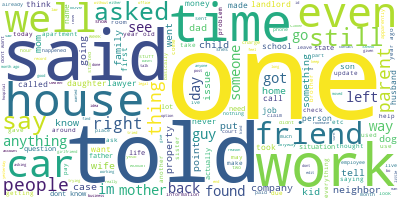

In [57]:
# repeat the wordcloud
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(post_data_text['final_alltext'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [58]:
# save
post_data_text.to_csv('./data/post_data_cleaned.csv', header=True, index = True)

In [6]:
# read in the cleaned file
post_data_cleaned = pd.read_csv('./data/post_data_cleaned.csv', index_col=0)
post_data_cleaned.head()

,title,text,alltext,alltext_processed,cleaned_alltext,tokenized_alltext,final_alltext
0,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,(Update) Neighbors child has disabilities and ...,(update) neighbors child has disabilities and ...,update neighbors child has disabilities and wo...,"['update', 'neighbor', 'child', 'disability', ...",update neighbor child disability wont stop cli...
1,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,[Super Awesome Update] Sat down on my friend's...,[super awesome update] sat down on my friend's...,super awesome update sat down on my friends ma...,"['super', 'awesome', 'update', 'sat', 'friend'...",super awesome update sat friend macbook broke ...
2,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,"I told my math teacher about my mother, and sh...",i told my math teacher about my mother and she...,i told my math teacher about my mother and she...,"['told', 'math', 'teacher', 'mother', 'got', '...",told math teacher mother got arrested got year...
3,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,[UPDATE] [PA] I followed and reported a drunk ...,[update] [pa] i followed and reported a drunk ...,update pa i followed and reported a drunk driv...,"['update', 'pa', 'followed', 'reported', 'drun...",update pa followed reported drunk driver got t...
4,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,"UPDATE: My father and step mother died, leavin...",update: my father and step mother died leaving...,update my father and step mother died leaving ...,"['update', 'father', 'step', 'mother', 'died',...",update father step mother died leaving step si...


In [19]:
# Make a file with title, text, final_alltext and post_id from post_data
processed_data = post_data['post_id'].to_frame().merge(post_data_cleaned[['title','text','final_alltext']], left_index=True, right_index=True)
processed_data.head()

,post_id,title,text,final_alltext
0,bhaof3,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,update neighbor child disability wont stop cli...
1,6dh9vh,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,super awesome update sat friend macbook broke ...
2,8brtfc,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,told math teacher mother got arrested got year...
3,bieir5,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,update pa followed reported drunk driver got t...
4,beuf9y,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,update father step mother died leaving step si...


In [20]:
# save
processed_data.to_csv('./data/processed_data.csv', header=True, index = True)

In [8]:
# read in the processed datafile
processed_data = pd.read_csv('./data/processed_data.csv', index_col=0)
processed_data.head()

,post_id,title,text,final_alltext
0,bhaof3,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,update neighbor child disability wont stop cli...
1,6dh9vh,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,super awesome update sat friend macbook broke ...
2,8brtfc,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,told math teacher mother got arrested got year...
3,bieir5,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,update pa followed reported drunk driver got t...
4,beuf9y,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,update father step mother died leaving step si...


## LDA part

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [10]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(processed_data['final_alltext'])

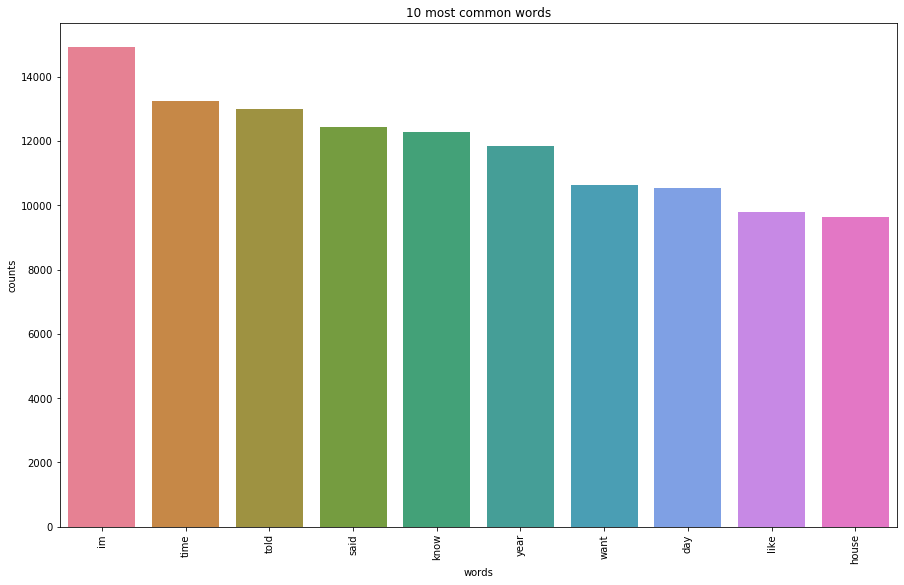

In [11]:
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

I can remove "i'm, time, told , said, know" manually in a separate preprocessing step

In [7]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [8]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10

In [14]:
number_topics = 15
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [13]:
# Print the topics found by the LDA model (5 topics)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
work company job pay time day employee im told legal

Topic #1:
dog neighbor property house im time home door said like

Topic #2:
car police said officer insurance told got called vehicle im

Topic #3:
year im know want child told time school said dont

Topic #4:
house landlord apartment month lease day money rent pay im


In [31]:
# 10 topics
number_topics = 10
number_words = 10
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
car item shop said told sold store day package flight

Topic #1:
car police officer said tree parking insurance told got im

Topic #2:
im know friend dont said police told want like got

Topic #3:
work school job employee company time told bos manager hour

Topic #4:
money account pay year dad mom bank card want im

Topic #5:
landlord apartment lease month day pay rent house new company

Topic #6:
child year son daughter mother kid want wife father parent

Topic #7:
doctor told hospital day said medical time work went test

Topic #8:
property lawyer court case year hoa letter attorney legal house

Topic #9:
dog neighbor house door home time cat police yard property


In [ ]:
number_topics = 15
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

In [15]:
# Print the topics found by the LDA model (15 topics)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
police im said told know time got like friend dont

Topic #1:
account card email phone credit number address bank sent information

Topic #2:
child year want parent son mom mother know kid daughter

Topic #3:
work company job time employee pay week day hour told

Topic #4:
video post picture friend police photo camera people update know

Topic #5:
car insurance vehicle parking police driver driveway truck company said

Topic #6:
store buyer item money sold manager shop sell tip sale

Topic #7:
month lease pay rent money landlord day house said court

Topic #8:
room gt hotel seller legal roof member board attorney guest

Topic #9:
dog neighbor animal cat yard house said home day vet

Topic #10:
doctor told day hospital work said time medical im test

Topic #11:
family house year mother money grandmother father died aunt passed

Topic #12:
property neighbor hoa fence water line land gas yard company

Topic #13:
school student tree class year teacher prope

In [16]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./models/ldavis_prepared_'+str(number_topics)+'.pkl')
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

C:\anaconda_python\envs\insight_2\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: write() argument must be str, not bytes

In [18]:
LDAvis_data_filepath = os.path.join('./models/ldavis_prepared_'+str(number_topics)+'.pkl')

In [21]:
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

In [22]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [23]:
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(number_topics) +'.html')

In [17]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.116899  0.003124       1        1  15.740282
2      0.136170  0.050750       2        1  14.176361
3     -0.045205  0.036339       3        1  10.743026
7     -0.026969  0.054417       4        1  10.427482
14     0.003330 -0.105934       5        1   7.829596
10     0.055234  0.013466       6        1   6.813521
5      0.007986 -0.050580       7        1   6.738951
1     -0.091415  0.183184       8        1   5.062327
4      0.023279  0.054650       9        1   4.235658
9      0.112813 -0.101560      10        1   4.140641
13     0.021427 -0.084826      11        1   3.832940
11     0.059808  0.066263      12        1   3.189501
12    -0.156571 -0.126651      13        1   3.024157
6     -0.087131  0.041320      14        1   2.436799
8     -0.129654 -0.033961      15        1   1.608759, topic_info=      Category         Freq      Term         Total  loglift  logprob
5237   Default  7908.000000       car   7908.000000  30.0000  30.0000
10614  Default  5222.000000       dog   5222.000000  29.0000  29.0000
34739  Default  4817.000000    school   4817.000000  28.0000  28.0000
31042  Default  5367.000000  property   5367.000000  27.0000  27.0000
25960  Default  4844.000000  neighbor   4844.000000  26.0000  26.0000
...        ...          ...       ...           ...      ...      ...
28994  Topic15    86.670052    person   3149.262858   0.5369  -5.9408
20950  Topic15    88.055438     issue   3611.869308   0.4157  -5.9249
8732   Topic15    77.425031    damage   1914.508559   0.9218  -6.0536
19579  Topic15    88.078910        im  14677.206012  -0.9861  -5.9247
22210  Topic15    76.652581       law   3016.058180   0.4573  -6.0636

[1206 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
35         4  0.921865  abatement
156       15  0.814114   abstract
164       14  0.918973        abu
170        1  0.094506      abuse
170        2  0.772812      abuse
...      ...       ...        ...
44606     13  0.013041       year
44606     14  0.003455       year
44606     15  0.005441       year
44727      1  0.043049    youtube
44727      9  0.947067    youtube

[5278 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 8, 15, 11, 6, 2, 5, 10, 14, 12, 13, 7, 9])

In [36]:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

C:\anaconda_python\envs\insight_2\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [37]:
pyLDAvis.display(LDAvis_prepared)

### Great visualization, what to do next? Attach topics to dataset?
    0 - Theft/refund
    1 - Traffic violation
    2 - Minor issue with update
    3 - Work/school issues
    4 - Money issues
    5 - Renter issues
    6 - Family issues
    7 - Medical issues
    8 - Property issues
    9 - Neighbor issues

In [42]:
lda.components_.shape

(10, 44827)

In [43]:
count_data

<17133x44827 sparse matrix of type '<class 'numpy.int64'>'
	with 1460122 stored elements in Compressed Sparse Row format>

In [45]:
pickle.dump(lda, open('./models/lda_model_1.pkl', 'wb'))

## Add in the topics to the data

In [54]:
processed_data.final_alltext[0]

'update neighbor child disability wont stop climbing fence entering house freeing dog original post httpswwwredditcomrlegaladvicecommentsbdxneighborschildhasdisabilitiesandwontstop im sad update kid took majority given advice called police nonemergency number asked officer come question issue im briefly explained officer show invite explain whole situation isnt really sure right asked supervisor come position supervisor show go whole thing go upstairs computer video clipped saved time entering backyard entering house garage watched one get cellphone go back car minute later come back flash drive asks copy video drive fill piece paper stating put drive signed repeated time minute later talking he cellphone entire time cps worker show review video take complete statement going back first time happened took two hour wanted precise accurate remember left anything wasnt sure officer cps worker head next door talk parent parent apparently shut door face said didnt want talk statement video c

In [50]:
count_data[0]

<1x44827 sparse matrix of type '<class 'numpy.int64'>'
	with 148 stored elements in Compressed Sparse Row format>

In [53]:
lda.transform(count_data[0])

array([[0.00043868, 0.28296547, 0.13526901, 0.01339156, 0.00043869,
        0.0004387 , 0.17264149, 0.12583305, 0.00043872, 0.26814462]])

In [56]:
processed_data.final_alltext[10]

'update mn school accusing cheating evidence im suspended want access social medium email prove innocence im updating last posthttpsredditvzw told wrote letter mom sign sent superintendent office also called said speak school called school principal office told take test presence math teacher came looked answer said another perfect score wanted leave said loudly think owe apology said yes accused cheating said yes another apology saying dont mental faculty get perfect score said im sorry left principal said dont push luck kid said wasnt luck also owe apology apologized said suspension reversed wont go record went counselor told year one student accused cheating proved teacher administrator wrong shouldnt give bad advice next poor student place thing sorted also im going arrogant aggressive like people spoke like said incredibly mean insulting thing pissed counselor given horrible advice thanks pointing right direction'

In [57]:
count_data[10]

<1x44827 sparse matrix of type '<class 'numpy.int64'>'
	with 91 stored elements in Compressed Sparse Row format>

In [60]:
lda.transform(count_data[10]).argmax()

3

In [72]:
topicdict =  {0 : 'Theft/Scam',
    1 : 'Traffic violation',
    2 : 'Unique',
    3 : 'Work/School issues',
    4 : 'Money issues',
    5 : 'Renter issues',
    6 : 'Family issues',
    7 : 'Medical issues',
    8 : 'Property issues',
    9 : 'Neighbor issues'}

In [85]:
n=np.random.randint(len(processed_data))
print(f'Topic for \n{processed_data.final_alltext[n]}\n is {topicdict[lda.transform(count_data[n]).argmax()]}')

Topic for 
vermont maine kid stole sister phone exploded child possession kid parent trying sue u injury yes extremely weird situation here backstory sister life maine bought shitty chinese phone aliexpress year ago today problem remembers isnt great tech visiting live vermont week afternoon smelled something metallic kitchen asked knew said didnt know noticed little bit clear smoke coming purse realize phone smoking panic little bit put phone outside door step start trying fan fume looking glass container baking soda second later go back outside see phone missing see kid running street immediately run street scream bring phone back fire safe youre going get hurt please bring back call tell happened tell phone smoking fire hazard chemical hazard lion battery say theyre going send police look kid fire truck ambulance well officer eventually show question u officer look kid dont hear anything else awhile fast forward hour later angry woman show door say son found phone middle street want

## 15 topics looks better actually
Topics found via LDA:

Topic #0:
police im said told know time got like friend dont

Topic #1:
account card email phone credit number address bank sent information

Topic #2:
child year want parent son mom mother know kid daughter

Topic #3:
work company job time employee pay week day hour told

Topic #4:
video post picture friend police photo camera people update know

Topic #5:
car insurance vehicle parking police driver driveway truck company said

Topic #6:
store buyer item money sold manager shop sell tip sale

Topic #7:
month lease pay rent money landlord day house said court

Topic #8:
room gt hotel seller legal roof member board attorney guest

Topic #9:
dog neighbor animal cat yard house said home day vet

Topic #10:
doctor told day hospital work said time medical im test

Topic #11:
family house year mother money grandmother father died aunt passed

Topic #12:
property neighbor hoa fence water line land gas yard company

Topic #13:
school student tree class year teacher property university ampxb parent

Topic #14:
apartment house landlord home room door im like time day

In [ ]:
topicdict =  {0 : 'Theft/Scam',
    1 : 'Traffic violation',
    2 : 'Unique',
    3 : 'Work/School issues',
    4 : 'Money issues',
    5 : 'Renter issues',
    6 : 'Family issues',
    7 : 'Medical issues',
    8 : 'Property issues',
    9 : 'Neighbor issues'}

In [47]:
lda.components_.shape

(15, 44827)

In [48]:
pickle.dump(lda, open('./models/lda_model_15.pkl', 'wb'))

In [51]:
topicdict =  {0 : 'Unique',
    1 : 'Banking',
    2 : 'Domestic',
    3 : 'Work',
    4 : 'Online',
    5 : 'Traffic',
    6 : 'Shopping',
    7 : 'Rent',
    8 : 'Sexual',
    9 : 'Neighbor',
    10: 'Medical',
    11: 'Family',
    12: 'Property',
    13: 'School',
    14: 'Landlord'
             }

In [68]:
n=np.random.randint(len(processed_data))
print(f'Topic for \n{processed_data.final_alltext[n]}\n is {topicdict[lda.transform(count_data[n]).argmax()]}')

Topic for 
neighbor poisoned antifreeze need help tn dog molly died june th nd vet called said urine sample sent positive antifreeze home surveillance camera watched footage weekend know neighbor around pm saturday th neighbor son came home went got light stand work shop turned shined camera facing shop hoping blind see one carry bucket screen min later come back carrying bucket filed police report th harassment day bought cam system installed following week im sure killing dog retaliation called police vet told dog poisoned made report time still going cam footage didnt evidence yet found today rd called police im going come tomorrow morning look evidence like saturday th day neighbor came property line obliviously checking camera pointing dead patch grass little wooded area house anything else really want make sure nail asshole anyone think anything else please let know thanks edit main worry footage isnt enough get arrested doesnt show putting antifreeze yard explain blinding camera

In [69]:
processed_data.head()

,post_id,title,text,final_alltext
0,bhaof3,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,update neighbor child disability wont stop cli...
1,6dh9vh,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,super awesome update sat friend macbook broke ...
2,8brtfc,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,told math teacher mother got arrested got year...
3,bieir5,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,update pa followed reported drunk driver got t...
4,beuf9y,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,update father step mother died leaving step si...


In [72]:
count_data.shape

(17133, 44827)

In [73]:
topics_per_data = [topicdict[lda.transform(count_data[i]).argmax()] for i in range(len(processed_data))]

In [75]:
topics_per_data[0:5]

['Unique', 'Shopping', 'Unique', 'Unique', 'Domestic']

In [76]:
processed_data['Topic'] = topics_per_data
processed_data.head()

,post_id,title,text,final_alltext,Topic
0,bhaof3,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,update neighbor child disability wont stop cli...,Unique
1,6dh9vh,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,super awesome update sat friend macbook broke ...,Shopping
2,8brtfc,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,told math teacher mother got arrested got year...,Unique
3,bieir5,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,update pa followed reported drunk driver got t...,Unique
4,beuf9y,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,update father step mother died leaving step si...,Domestic


In [77]:
processed_data.tail()

,post_id,title,text,final_alltext,Topic
17128,aydcta,"Creative ad agency swindled our business, foun...",I was part of the team that commissioned a loc...,creative ad agency swindled business found wor...,Work
17129,awbt1t,Grandma escaped from care facility in 40 degre...,"Yesterday my grandma (87 years old), somehow g...",grandma escaped care facility degree weather f...,Medical
17130,bdunxk,Someone uploaded a picture of my friends son o...,My friend is an orthodox jew living in the old...,someone uploaded picture friend son onto pixab...,Online
17131,cf1gi7,Grandmothers nursing home is asking her to lea...,"(UT, USA)\n\nPosting on behalf of my grandmoth...",grandmother nursing home asking leave allow el...,Landlord
17132,dmzlde,HR sent me an email that an audit had revealed...,"A few months less than a year ago, I received ...",hr sent email audit revealed initial offer emp...,Work


In [78]:
processed_data.Topic.value_counts()

Domestic    2959
Unique      2553
Work        2010
Rent        1767
Traffic     1297
Landlord    1258
Medical      977
Banking      801
Online       756
Neighbor     699
School       639
Family       516
Property     454
Shopping     330
Sexual       117
Name: Topic, dtype: int64

In [79]:
# save
processed_data.to_csv('./data/processed_data_topic.csv', header=True, index = True)

### Add in bigram info

In [26]:
import gensim
from gensim.utils import simple_preprocess

C:\anaconda_python\envs\insight_2\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [35]:
processed_data.head()

,post_id,title,text,final_alltext
0,bhaof3,(Update) Neighbors child has disabilities and ...,Original post: https://www.reddit.com/r/legala...,update neighbor child disability wont stop cli...
1,6dh9vh,[Super Awesome Update] Sat down on my friend's...,I never thought this would turn out the way it...,super awesome update sat friend macbook broke ...
2,8brtfc,"I told my math teacher about my mother, and sh...",I got my 13 year old brother after school yest...,told math teacher mother got arrested got year...
3,bieir5,[UPDATE] [PA] I followed and reported a drunk ...,This is an update to my [original post](https:...,update pa followed reported drunk driver got t...
4,beuf9y,"UPDATE: My father and step mother died, leavin...",[Here's my original post](https://www.reddit.c...,update father step mother died leaving step si...


In [29]:
data=processed_data['final_alltext'].tolist()
data_words = list(sent_to_words(data))

In [32]:
len(data_words[0])

268

In [33]:
print(data_words[:1][0][:30])

['update', 'neighbor', 'child', 'disability', 'wont', 'stop', 'climbing', 'fence', 'entering', 'house', 'freeing', 'dog', 'original', 'post', 'im', 'sad', 'update', 'kid', 'took', 'majority', 'given', 'advice', 'called', 'police', 'nonemergency', 'number', 'asked', 'officer', 'come', 'question']


In [36]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [37]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['im', 'time', 'told', 'said', 'know'])

[nltk_data] Downloading package stopwords to C:\Users\Aditya
[nltk_data]     (Work)\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [39]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [43]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words_bigrams)

In [44]:
# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 2), (13, 6), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 4), (21, 1), (22, 1), (23, 2), (24, 3), (25, 2), (26, 1), (27, 3), (28, 1), (29, 1)]


In [45]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=15, 
                                       random_state=4,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [46]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"police" + 0.016*"phone" + 0.013*"name" + 0.011*"report" + '
  '0.011*"call" + 0.010*"number" + 0.010*"back" + 0.009*"video" + '
  '0.008*"called" + 0.008*"friend"'),
 (1,
  '0.023*"year" + 0.016*"mother" + 0.014*"want" + 0.013*"father" + '
  '0.013*"parent" + 0.013*"get" + 0.012*"family" + 0.011*"would" + '
  '0.010*"house" + 0.010*"money"'),
 (2,
  '0.022*"dog" + 0.011*"back" + 0.010*"get" + 0.008*"home" + 0.008*"day" + '
  '0.008*"door" + 0.007*"one" + 0.007*"go" + 0.007*"got" + 0.007*"night"'),
 (3,
  '0.052*"court" + 0.025*"case" + 0.020*"lawyer" + 0.015*"judge" + '
  '0.015*"charge" + 0.013*"date" + 0.010*"jail" + 0.010*"filed" + '
  '0.010*"attorney" + 0.010*"hearing"'),
 (4,
  '0.023*"money" + 0.023*"pay" + 0.016*"account" + 0.014*"back" + '
  '0.013*"check" + 0.012*"paid" + 0.011*"bank" + 0.011*"month" + '
  '0.011*"payment" + 0.010*"company"'),
 (5,
  '0.013*"like" + 0.012*"get" + 0.012*"dont" + 0.010*"want" + 0.009*"would" + '
  '0.009*"really" + 0.009*"thing" 

## Let's make a version that keeps most of the original info

In [5]:
#combine the title and text
post_data['alltext']= post_data['title'] + ' ' + post_data['text']
post_data.head()

,post_id,title,url,text,score,num_comments,created,alltext
0,bhaof3,(Update) Neighbors child has disabilities and ...,https://www.reddit.com/r/legaladvice/comments/...,Original post: https://www.reddit.com/r/legala...,55763,4,4/25/2019 12:29,(Update) Neighbors child has disabilities and ...
1,6dh9vh,[Super Awesome Update] Sat down on my friend's...,https://www.reddit.com/r/legaladvice/comments/...,I never thought this would turn out the way it...,54473,2,5/26/2017 10:27,[Super Awesome Update] Sat down on my friend's...
2,8brtfc,"I told my math teacher about my mother, and sh...",https://www.reddit.com/r/legaladvice/comments/...,I got my 13 year old brother after school yest...,40091,5,4/12/2018 13:09,"I told my math teacher about my mother, and sh..."
3,bieir5,[UPDATE] [PA] I followed and reported a drunk ...,https://www.reddit.com/r/legaladvice/comments/...,This is an update to my [original post](https:...,38858,3,4/28/2019 14:48,[UPDATE] [PA] I followed and reported a drunk ...
4,beuf9y,"UPDATE: My father and step mother died, leavin...",https://www.reddit.com/r/legaladvice/comments/...,[Here's my original post](https://www.reddit.c...,35337,4,4/18/2019 23:06,"UPDATE: My father and step mother died, leavin..."


In [7]:
import pickle
lda=pickle.load(open('./models/lda_model_1.pkl', 'rb'))

In [12]:
topics_per_data = [lda.transform(count_data[i]).argmax() for i in range(len(processed_data))]

In [13]:
#198 empty text field, fill with title, probably deleted
post_data[post_data['alltext'].isna()]

,post_id,title,url,text,score,num_comments,created,alltext
5,awvja4,Deadbeat dad ditched my mom when she was pregn...,https://www.reddit.com/r/legaladvice/comments/...,NaN,33299,113,3/3/2019 11:26,NaN
98,bgkowm,"One of my relatives is ""Homeschooling"" her kid...",https://www.reddit.com/r/legaladvice/comments/...,NaN,13482,255,4/23/2019 15:39,NaN
178,be9yw9,I work for a privately owned brewery/restauran...,https://www.reddit.com/r/legaladvice/comments/...,NaN,10058,86,4/17/2019 12:39,NaN
279,9hpure,Police Officer: I am going to search your vehi...,https://www.reddit.com/r/legaladvice/comments/...,NaN,7698,199,9/21/2018 9:26,NaN
298,cdkkka,[AL] my brother was attacked in Federal Prison...,https://www.reddit.com/r/legaladvice/comments/...,NaN,7408,72,7/15/2019 13:35,NaN
...,...,...,...,...,...,...,...,...
16393,5xu5zk,"QUEBEC(Canada): last week, my roommate and I w...",https://www.reddit.com/r/legaladvice/comments/...,NaN,106,38,3/6/2017 11:30,NaN
16402,8hg277,"Question: As a military retiree, does my wife ...",https://www.reddit.com/r/legaladvice/comments/...,NaN,106,29,5/6/2018 11:49,NaN
16467,5criyt,Broke up with my gf. She got a lawyer and gave...,https://www.reddit.com/r/legaladvice/comments/...,NaN,106,15,11/13/2016 14:21,NaN
16520,4u2twg,"From torture to tiny bruises, 7 years of CPS i...",https://www.reddit.com/r/legaladviceofftopic/c...,NaN,105,2,7/22/2016 9:48,NaN


In [14]:
post_data['alltext'].fillna(post_data['title'], inplace=True)

In [15]:
topicdict =  {0 : 'Other',
    1 : 'Banking',
    2 : 'Domestic',
    3 : 'Work',
    4 : 'Online',
    5 : 'Traffic',
    6 : 'Shopping',
    7 : 'Rent',
    8 : 'Sexual',
    9 : 'Neighbor',
    10: 'Medical',
    11: 'Family',
    12: 'Property',
    13: 'School',
    14: 'Landlord'
             }

In [16]:
topicnames_per_data = [topicdict[x] for x in topics_per_data]

In [17]:
post_data['Topic'] = topics_per_data
post_data['TopicName'] = topicnames_per_data
post_data.head()

,post_id,title,url,text,score,num_comments,created,alltext,Topic,TopicName
0,bhaof3,(Update) Neighbors child has disabilities and ...,https://www.reddit.com/r/legaladvice/comments/...,Original post: https://www.reddit.com/r/legala...,55763,4,4/25/2019 12:29,(Update) Neighbors child has disabilities and ...,1,Banking
1,6dh9vh,[Super Awesome Update] Sat down on my friend's...,https://www.reddit.com/r/legaladvice/comments/...,I never thought this would turn out the way it...,54473,2,5/26/2017 10:27,[Super Awesome Update] Sat down on my friend's...,2,Domestic
2,8brtfc,"I told my math teacher about my mother, and sh...",https://www.reddit.com/r/legaladvice/comments/...,I got my 13 year old brother after school yest...,40091,5,4/12/2018 13:09,"I told my math teacher about my mother, and sh...",2,Domestic
3,bieir5,[UPDATE] [PA] I followed and reported a drunk ...,https://www.reddit.com/r/legaladvice/comments/...,This is an update to my [original post](https:...,38858,3,4/28/2019 14:48,[UPDATE] [PA] I followed and reported a drunk ...,1,Banking
4,beuf9y,"UPDATE: My father and step mother died, leavin...",https://www.reddit.com/r/legaladvice/comments/...,[Here's my original post](https://www.reddit.c...,35337,4,4/18/2019 23:06,"UPDATE: My father and step mother died, leavin...",6,Shopping


In [18]:
# save
post_data.to_csv('./data/post_data_topics.csv', header=True, index = True)